In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
import seaborn as sns

In [5]:
sns.set()

In [6]:
import matplotlib.pyplot as plt


In [7]:
import os

In [8]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.np_utils import to_categorical
from keras.optimizers import Adam

Using TensorFlow backend.
c:\users\pravi\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\pravi\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\pravi\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16

In [9]:

import warnings
warnings.filterwarnings("ignore")

In [10]:
path= 'F:/ClassRecording/SEM-7/New folder/'

In [11]:
train_text =  pd.read_csv(path+'training_text', sep='\|\|', header=None, skiprows = 1, names=["ID", "Text"])

In [12]:
train_text =  pd.read_csv(path+'training_text', sep='\|\|', header=None, skiprows = 1, names=["ID", "Text"])
train_variants =  pd.read_csv(path+'training_variants')

In [13]:
train_text.shape

(3321, 2)

In [15]:
train_variants.shape

(3321, 4)

In [16]:
#merging text with train datas
train = pd.merge(train_variants,train_text, how='left',on='ID')
#left join based on its id

In [17]:
train.isnull().sum()
#print sum of missing values

ID           0
Gene         0
Variation    0
Class        0
Text         5
dtype: int64

In [18]:
#remove missing values such as null in dataset and copies to dataframe train
df_train = train.dropna(axis=0).copy()
#array dimension 
df_train.shape

(3316, 5)

In [19]:
df_train.head()
#gives top 5 rows ->head

,ID,Gene,Variation,Class,Text
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...
2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...
3,3,CBL,N454D,3,Recent evidence has demonstrated that acquired...
4,4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...


In [20]:
df_train

,ID,Gene,Variation,Class,Text
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...
2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...
3,3,CBL,N454D,3,Recent evidence has demonstrated that acquired...
4,4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...
...,...,...,...,...,...
3316,3316,RUNX1,D171N,4,Introduction Myelodysplastic syndromes (MDS) ...
3317,3317,RUNX1,A122*,1,Introduction Myelodysplastic syndromes (MDS) ...
3318,3318,RUNX1,Fusions,1,The Runt-related transcription factor 1 gene (...
3319,3319,RUNX1,R80C,4,The RUNX1/AML1 gene is the most frequent targe...


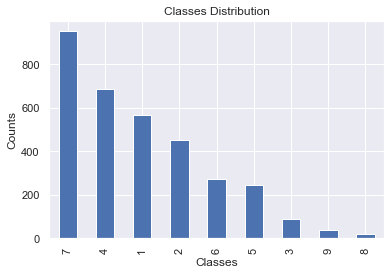

Number of data points in class 1 : 952 ( 28.709 %)
Number of data points in class 2 : 686 ( 20.688 %)
Number of data points in class 3 : 566 ( 17.069 %)
Number of data points in class 4 : 452 ( 13.631 %)
Number of data points in class 5 : 273 ( 8.233 %)
Number of data points in class 6 : 242 ( 7.298 %)
Number of data points in class 7 : 89 ( 2.684 %)
Number of data points in class 8 : 37 ( 1.116 %)
Number of data points in class 9 : 19 ( 0.573 %)


In [21]:
df_train.Class.value_counts().plot(kind="bar",title='Classes Distribution')
plt.xlabel('Classes')
plt.ylabel('Counts')
plt.show()
#shows count for classes 1-9
#class count
train_class_distribution = df_train['Class'].value_counts()
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/df_train.shape[0]*100), 3), '%)')

import re, string
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

In [22]:
#getting english stopwords from nltk 
import re, string
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
sw_list = stopwords.words('english')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pravi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
#add punctuation
sw_list += list(string.punctuation)
sw_list += ["''", '""', '...', '``', '’', '“', '’', '”', '‘', '‘',"'", '©',
'said',"'s", "also",'one',"n't",'com', 'satirewire', '-', '–', "et al",
'—', '_','et al ',"/"]
sw_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [24]:
#eleminating duplicates by adding to set
sw_set = set(sw_list)

In [25]:
print(sw_set)

{"haven't", ')', "aren't", 'nor', '*', "should've", 'such', "didn't", "it's", "that'll", 'under', 'some', '!', 'only', '`', 'at', 'until', 'it', "''", "mustn't", '}', '“', "couldn't", 'll', 'through', 'not', 'm', '``', 'ain', "mightn't", "doesn't", '&', '%', 'their', 'in', 'couldn', 'ourselves', 'hers', 'most', '\\', 'd', 'further', 'into', 'down', 's', ':', 'et al', 'yourself', 'just', 'ours', ',', 'do', 'didn', ';', 'an', 'were', 'here', 'from', '$', '?', 'those', 'myself', '"', 'himself', 't', 'now', 'isn', "won't", 'you', "needn't", '^', 'et al ', 'how', '{', 'by', 'can', 'doesn', 'has', '@', ']', 'or', 'off', 'him', 'one', 'few', 'both', 'again', 'he', 'its', 'to', 'than', 'that', "'", 'before', 'won', '""', 'where', 'any', '[', '=', 'will', 'whom', '(', 'themselves', 'ma', 'her', 'aren', 'being', 're', 'them', 'who', "wouldn't", 'what', 'more', 'of', 'hadn', '...', '~', 'too', "isn't", 'during', 'have', "shan't", 'theirs', 'mustn', 'y', 'me', 'is', 'these', 'haven', '#', '<', 'up

In [26]:
#tokenization using nltk
#word tokenization is used here -> sentence breaks into words
def process_review(review):
    tokens = nltk.word_tokenize(review)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in sw_set]
    return stopwords_removed

In [27]:
#stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
def stemming(review):
    stemmed_review = []
    for w in review:
        stemmed_review.append(ps.stem(w))
    return stemmed_review 

In [28]:
# import libraries
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('punkt')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pravi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pravi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [29]:
#lemmatixation
#pos = v is verb of that word
def lemmatization(review):
    lemma_list=[]
    for word in review:
        lemma_word=lemmatizer.lemmatize(word,pos='v') 
        lemma_list.append(lemma_word)
    return lemma_list

In [30]:
from datetime import datetime

now = datetime.now()

print("Current Time =", now)

Current Time = 2022-01-11 23:46:32.200816


In [31]:
#obtaining cleaned text data
def data_preprocessing(review):
    #tokenization, stop words removal, punctuation marks removel
    now = datetime.now();
    t_starttime = now.strftime("%H:%M:%S")
    print("start Time tokenization=", t_starttime)
    processed_review=list(map(process_review,review))
    now = datetime.now()
    t_stoptime = now.strftime("%H:%M:%S")
    print("stop Time tokenization=", t_stoptime)
    # stemming
    now = datetime.now()
    l_starttime = now.strftime("%H:%M:%S")
    print("start Time stemming=", l_starttime)
    stemming_reviews=list(map(stemming,processed_review))
    now = datetime.now()
    l_stoptime = now.strftime("%H:%M:%S")
    print("stop Time stemming=", l_stoptime)
    # lemmatization
    now = datetime.now()
    s_starttime = now.strftime("%H:%M:%S")
    print("start Time lemmatization=", s_starttime)
    lemma_reviews=list(map(lemmatization,stemming_reviews))
    now = datetime.now()
    s_stoptime = now.strftime("%H:%M:%S")
    print("stop Time lemmatization=", s_stoptime)
    #print(lemma_reviews)
    return lemma_reviews

In [32]:
cleaned_train_text=data_preprocessing(df_train['Text'])


start Time tokenization= 23:46:32
stop Time tokenization= 23:51:11
start Time stemming= 23:51:11
stop Time stemming= 00:00:16
start Time lemmatization= 00:00:16
stop Time lemmatization= 00:02:18


In [33]:
processed_review=process_review("Recent evidence has demonstrated that acquired uniparental disomy (aUPD)")
newstem = stemming(processed_review)
newlemat  = lemmatization(newstem)
newlemat

['recent', 'evid', 'demonstr', 'acquir', 'uniparent', 'disomi', 'aupd']

In [34]:

import pickle
pickle_out1=open('cleaned_train_text', 'wb')
pickle.dump(cleaned_train_text, pickle_out1)
pickle_out1.close()

In [35]:
import pickle
pickle_in_train = open("cleaned_train_text","rb")
cleaned_train_text = pickle.load(pickle_in_train)

In [36]:
df_train['cleaned_text']=[" ".join(i) for i in cleaned_train_text]

In [37]:
df_train

,ID,Gene,Variation,Class,Text,cleaned_text
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...,cyclin-depend kinas cdk regul varieti fundamen...
1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...,abstract background non-smal cell lung cancer ...
2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...,abstract background non-smal cell lung cancer ...
3,3,CBL,N454D,3,Recent evidence has demonstrated that acquired...,recent evid demonstr acquir uniparent disomi a...
4,4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...,oncogen mutat monomer casita b-lineag lymphoma...
...,...,...,...,...,...,...
3316,3316,RUNX1,D171N,4,Introduction Myelodysplastic syndromes (MDS) ...,introduct myelodysplast syndrom md heterogen g...
3317,3317,RUNX1,A122*,1,Introduction Myelodysplastic syndromes (MDS) ...,introduct myelodysplast syndrom md heterogen g...
3318,3318,RUNX1,Fusions,1,The Runt-related transcription factor 1 gene (...,runt-rel transcript factor 1 gene runx1 alias ...
3319,3319,RUNX1,R80C,4,The RUNX1/AML1 gene is the most frequent targe...,runx1/aml1 gene frequent target chromosom tran...


In [38]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [39]:
# Apply the function above foe each class
class1 = get_top_n_bigram(df_train[df_train['Class']==1]['cleaned_text'], 30)
class2=  get_top_n_bigram(df_train[df_train['Class']==2]['cleaned_text'], 30)
class3 = get_top_n_bigram(df_train[df_train['Class']==3]['cleaned_text'], 30)
class4 = get_top_n_bigram(df_train[df_train['Class']==4]['cleaned_text'], 30)
class5 = get_top_n_bigram(df_train[df_train['Class']==5]['cleaned_text'], 30)
class6 = get_top_n_bigram(df_train[df_train['Class']==6]['cleaned_text'], 30)
class7 = get_top_n_bigram(df_train[df_train['Class']==7]['cleaned_text'], 30)
class8 = get_top_n_bigram(df_train[df_train['Class']==8]['cleaned_text'], 30)
class9 = get_top_n_bigram(df_train[df_train['Class']==9]['cleaned_text'], 30)

In [40]:
classes_data=[class1[1:],class2[1:],class3[1:],class4[1:],class5[1:],
              class6[1:],class7[1:],class8[1:],class9[1:]]
colors=['r','b','g','pink','c','m','y','aqua','plum']

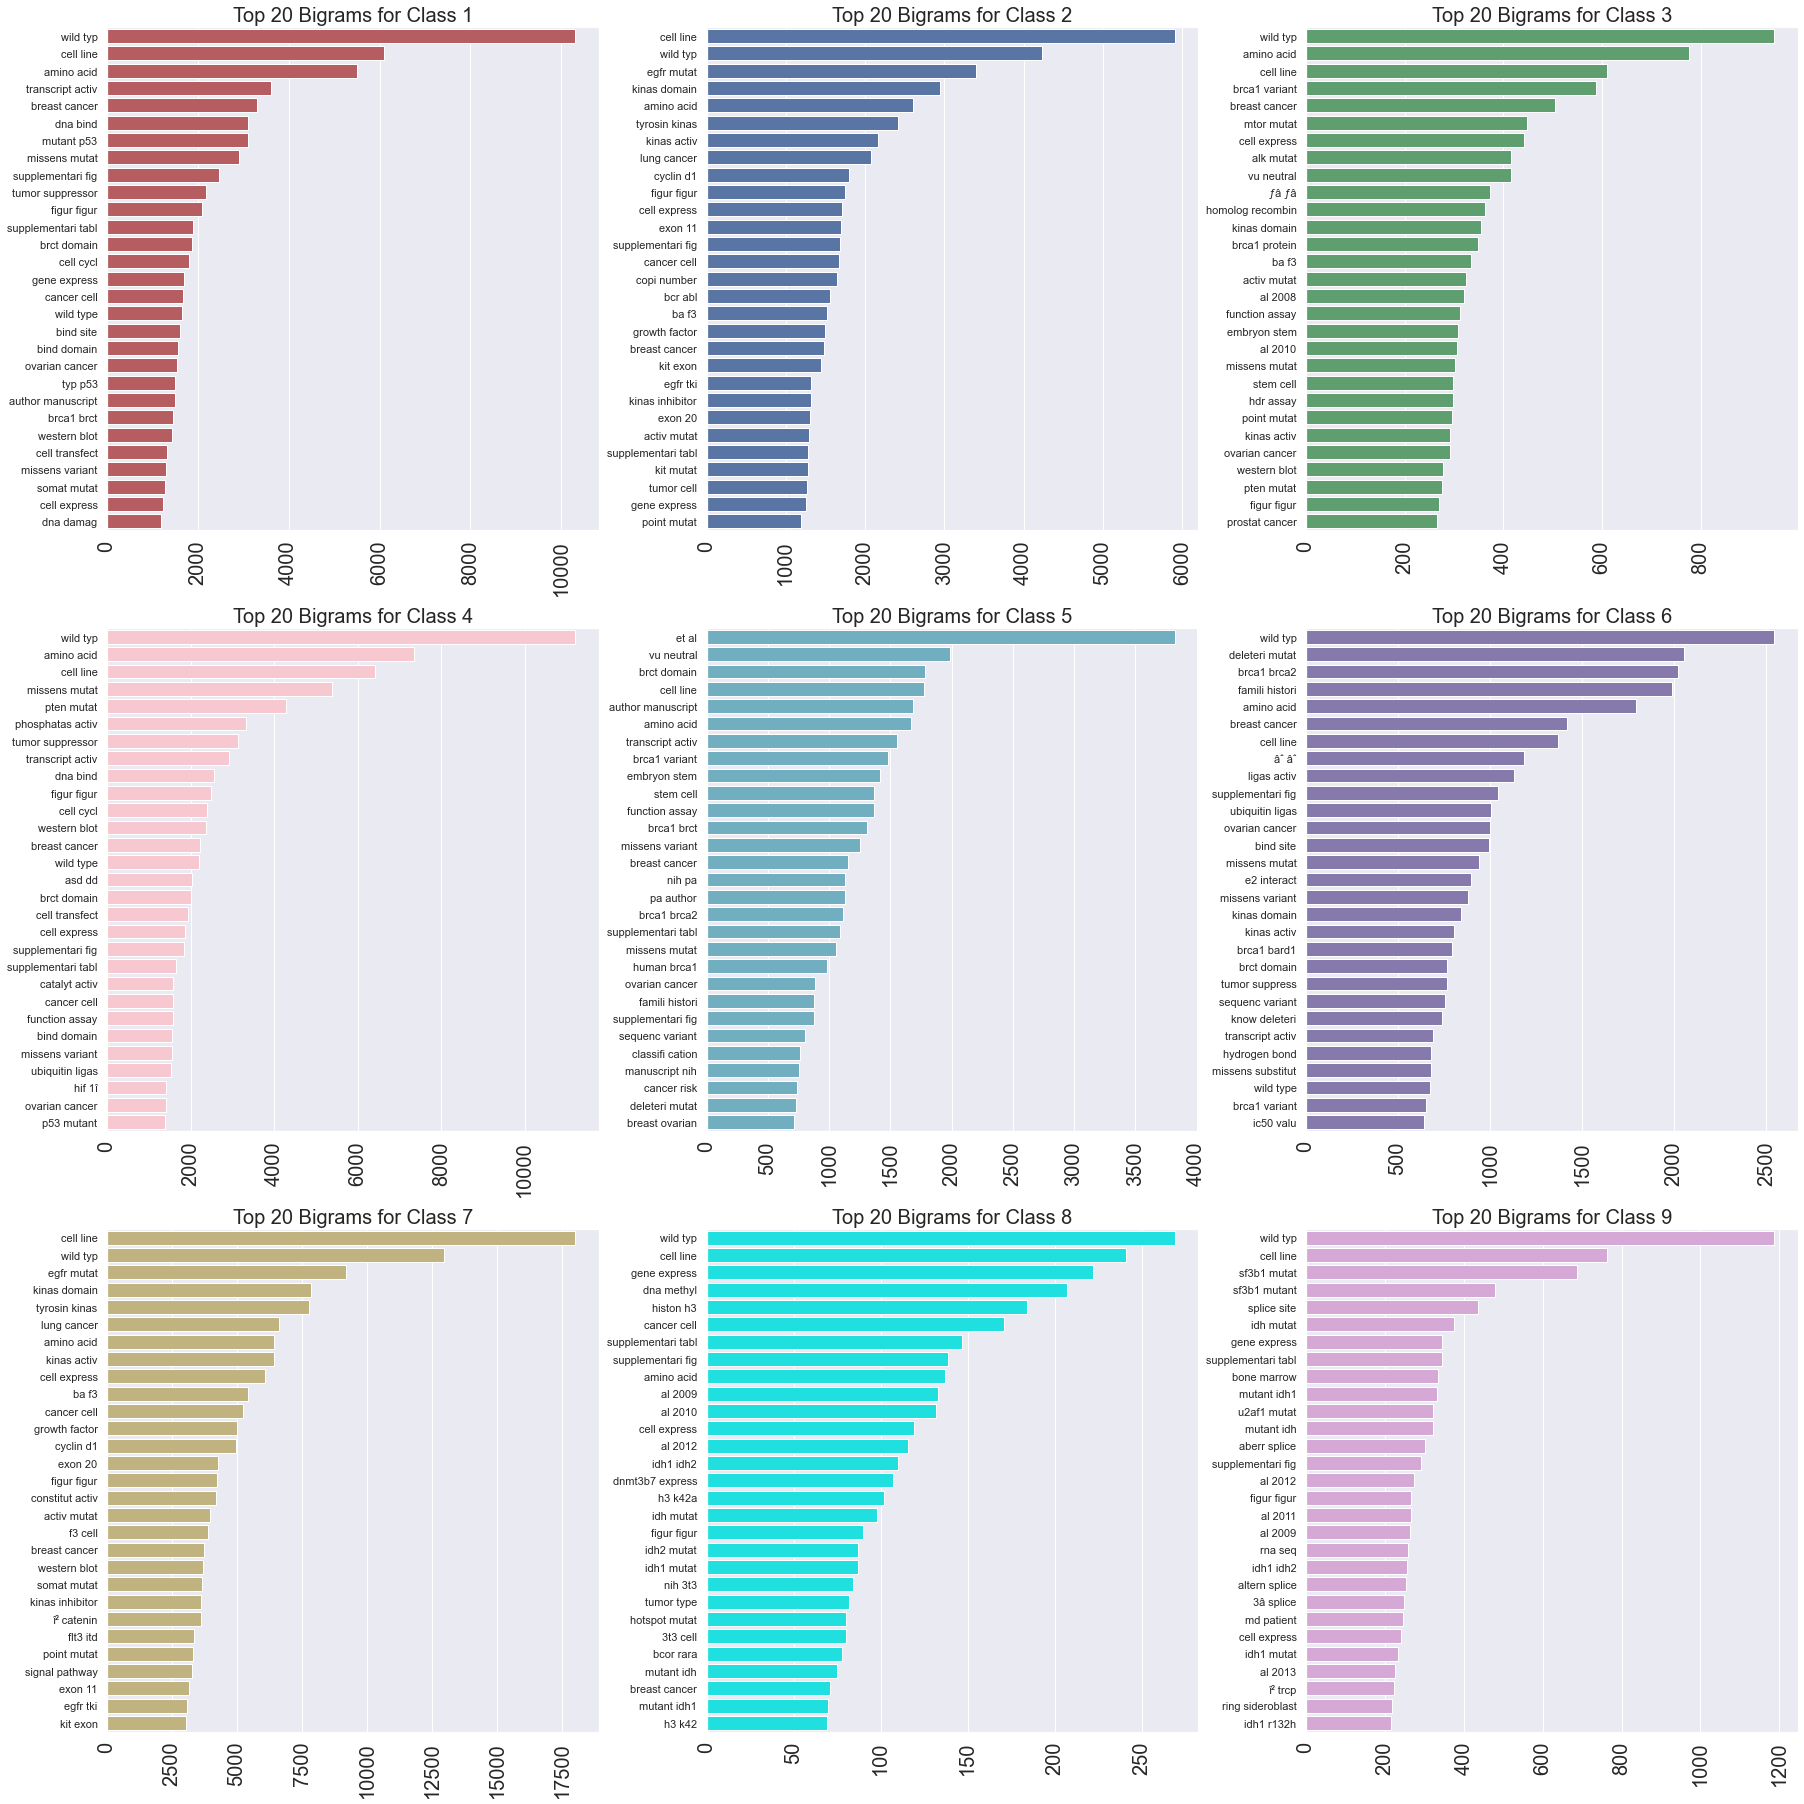

In [41]:
plt.figure(figsize=(25,25))
for i in range(0,9):
    plt.subplot(3,3,i+1)
    x=[x[0] for x in classes_data[i]]
    y=[x[1] for x in  classes_data[i]]
    sns.barplot(y,x,color=colors[i])
    plt.xticks(rotation=90,fontsize=20)
    plt.title("Top 20 Bigrams for Class {}".format(i+1),fontsize=20)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

In [42]:
def get_top_n_ngram(corpus, n=None,k=None):
    vec = CountVectorizer(ngram_range=(k,k )).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [43]:
class1t = get_top_n_ngram(df_train[df_train['Class']==1]['cleaned_text'], 30,5)
class2t = get_top_n_ngram(df_train[df_train['Class']==2]['cleaned_text'], 30,5)
class3t = get_top_n_ngram(df_train[df_train['Class']==3]['cleaned_text'], 30,5)
class4t = get_top_n_ngram(df_train[df_train['Class']==4]['cleaned_text'], 30,5)
class5t = get_top_n_ngram(df_train[df_train['Class']==5]['cleaned_text'], 30,5)
class6t = get_top_n_ngram(df_train[df_train['Class']==6]['cleaned_text'], 30,5)
class7t = get_top_n_ngram(df_train[df_train['Class']==7]['cleaned_text'], 30,5)
class8t = get_top_n_ngram(df_train[df_train['Class']==8]['cleaned_text'], 30,5)
class9t = get_top_n_ngram(df_train[df_train['Class']==9]['cleaned_text'], 30,5)

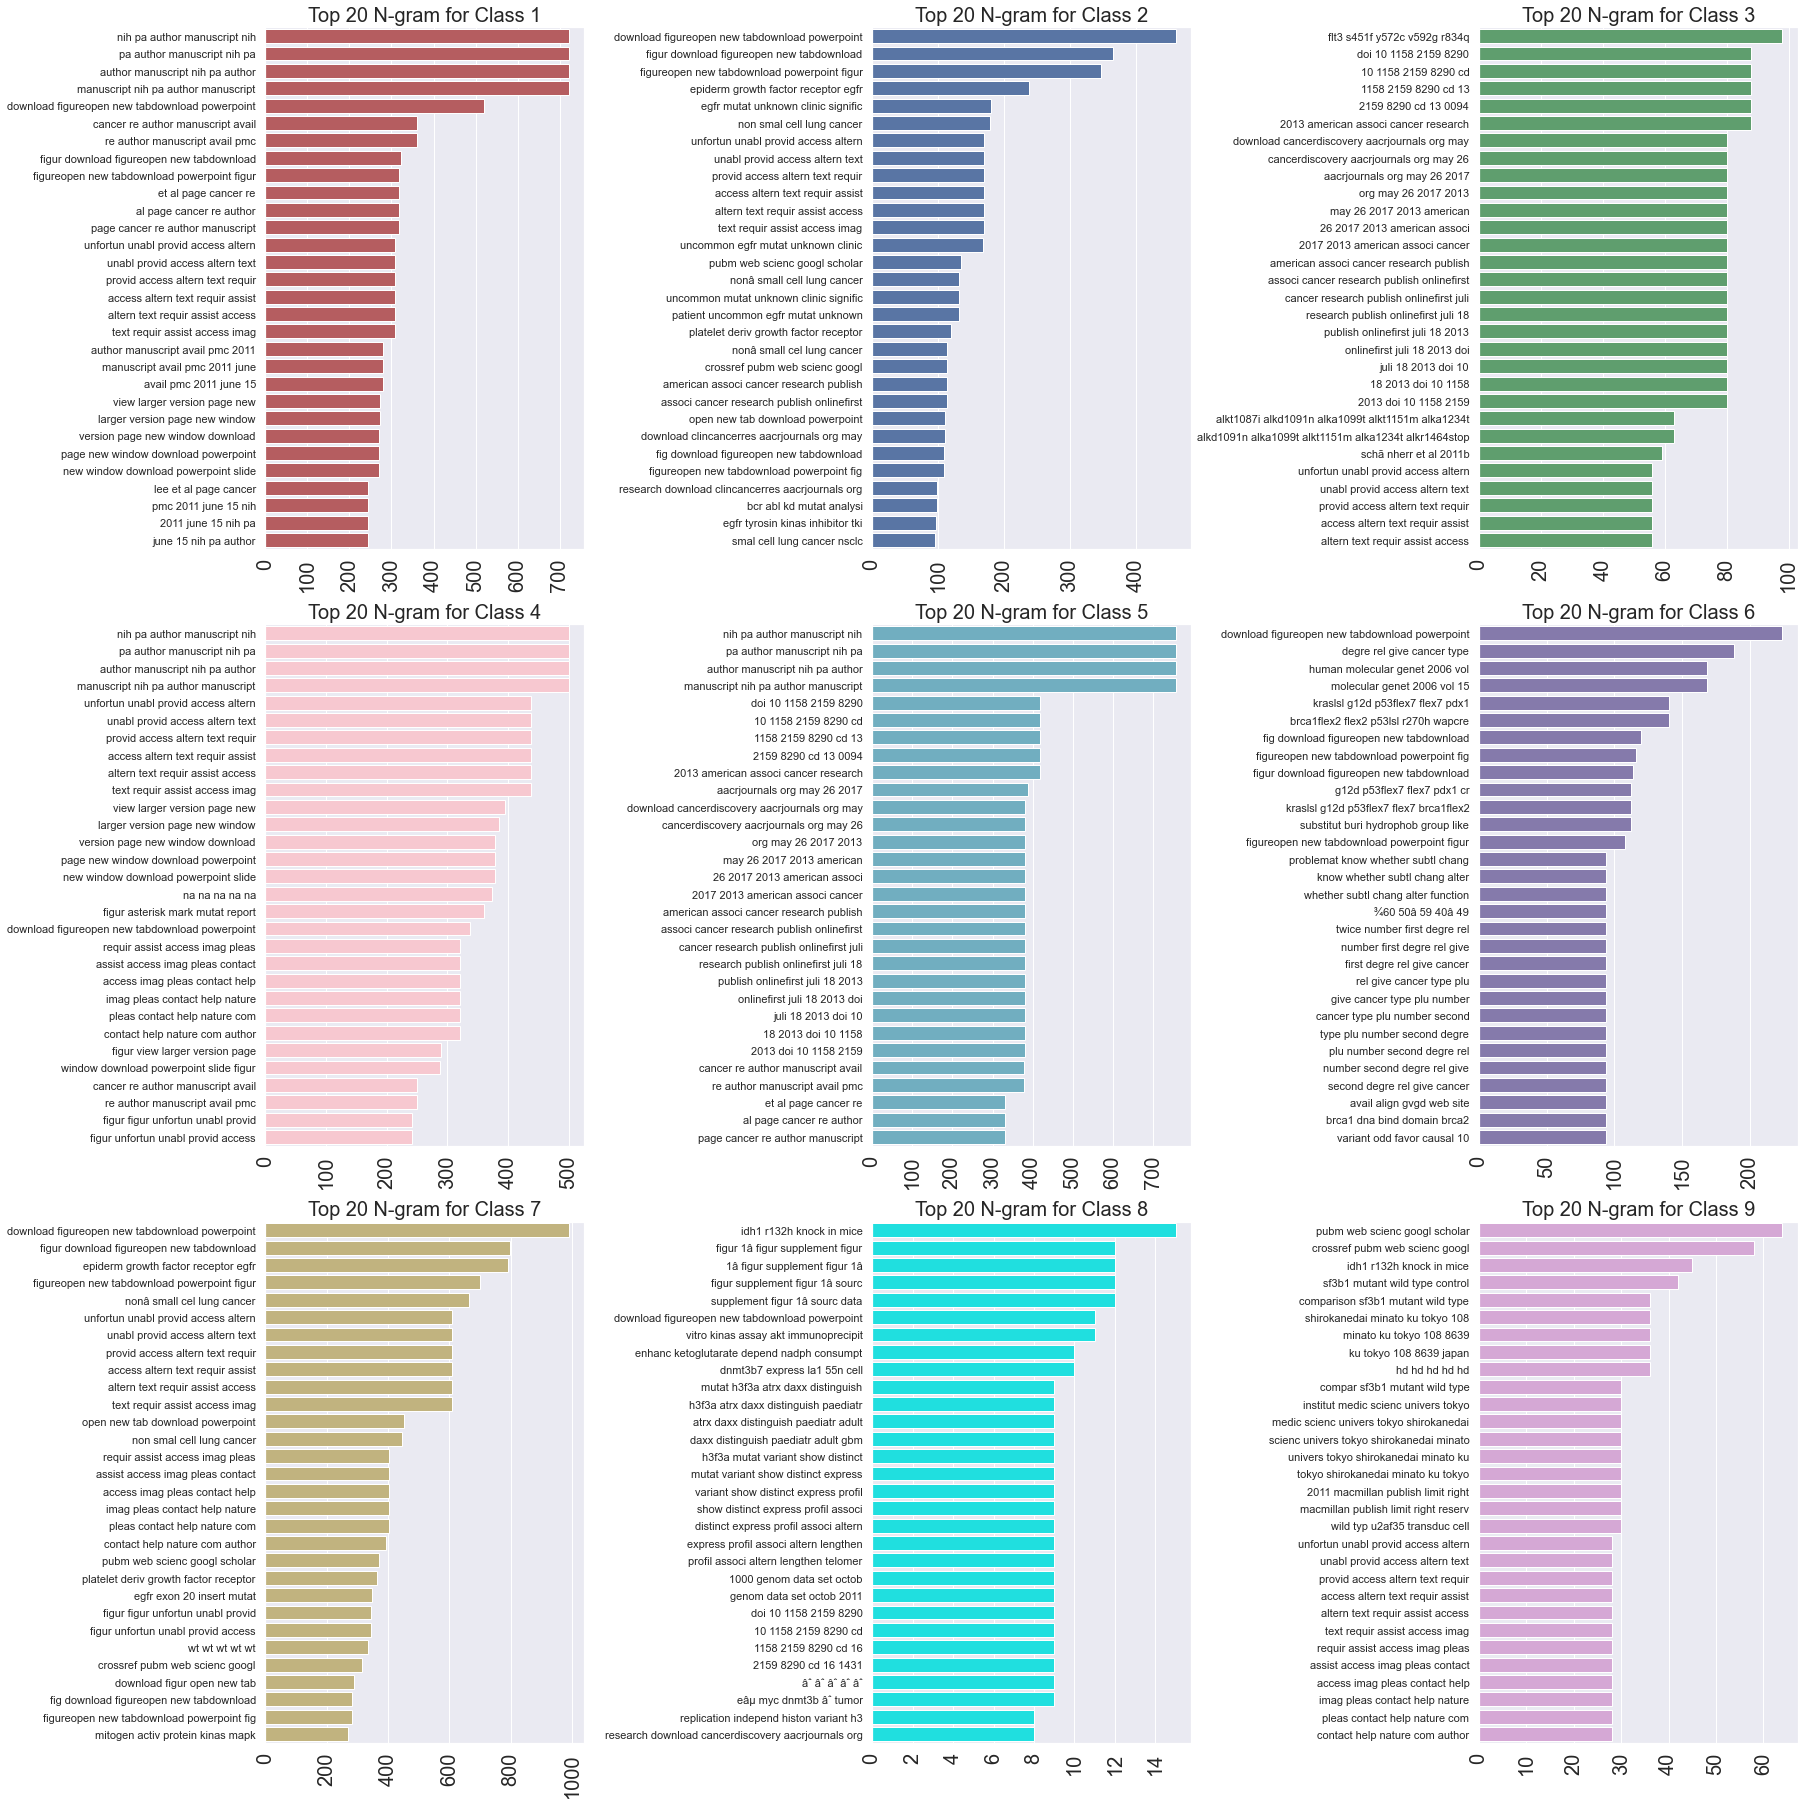

In [44]:
classest_data=[class1t,class2t,class3t,class4t,class5t,
              class6t,class7t,class8t,class9t]
plt.figure(figsize=(25,25))
# good reviews bigrams
for i in range(0,9):
    plt.subplot(3,3,i+1)
    x=[x[0] for x in classest_data[i]]
    y=[x[1] for x in  classest_data[i]]
    sns.barplot(y,x,color=colors[i])
    plt.xticks(rotation=90,fontsize=20)
    plt.title("Top 20 N-gram for Class {}".format(i+1),fontsize=20)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

## Resampling

In [45]:
from sklearn.utils import resample

In [46]:
#declare inputs and target
inputs=df_train[['ID', 'Gene', 'Variation','Class','cleaned_text']]
target=df_train.Class

In [47]:
training  = pd.DataFrame()
training[list(inputs.columns)]=inputs
training['target']=target
training.head()

,ID,Gene,Variation,Class,cleaned_text,target
0,0,FAM58A,Truncating Mutations,1,cyclin-depend kinas cdk regul varieti fundamen...,1
1,1,CBL,W802*,2,abstract background non-smal cell lung cancer ...,2
2,2,CBL,Q249E,2,abstract background non-smal cell lung cancer ...,2
3,3,CBL,N454D,3,recent evid demonstr acquir uniparent disomi a...,3
4,4,CBL,L399V,4,oncogen mutat monomer casita b-lineag lymphoma...,4


In [48]:
# separate minority and majority classes
classes_list=[]
for i in range(0,9):
    class_i= training[training.target==i+1]
    classes_list.append(class_i)
    print("Class {}: ".format(i+1)+str(len(class_i)))

Class 1: 566
Class 2: 452
Class 3: 89
Class 4: 686
Class 5: 242
Class 6: 273
Class 7: 952
Class 8: 19
Class 9: 37


In [49]:
# upsample minority
def oversampling(majority,minority):
    minority_upsampled = resample(minority,
                              replace=True, # sample with replacement
                              n_samples=len(majority), # match number in majority class
                              random_state=365) # reproducible results
    return minority_upsampled

In [50]:
classes_list.pop(-3)

,ID,Gene,Variation,Class,cleaned_text,target
28,28,TERT,C228T,7,sequenc studi identifi mani recurr code mutat ...,7
31,31,TERT,Promoter Mutations,7,sequenc studi identifi mani recurr code mutat ...,7
34,34,TERT,C250T,7,sequenc studi identifi mani recurr code mutat ...,7
67,67,RHEB,Y35C,7,gene encod compon pi3k-akt-mtor signal axi fre...,7
68,68,RHEB,Y35N,7,gene encod compon pi3k-akt-mtor signal axi fre...,7
...,...,...,...,...,...,...
3292,3292,RET,C634Y,7,investigatedth transformingactivityofth ret pr...,7
3294,3294,RET,R886W,7,introduct inherit germ line activ mutat rearra...,7
3296,3296,RET,Y791F,7,ret proto-oncogen encod receptor tyrosin kinas...,7
3308,3308,RUNX1,R174*,7,famili platelet disord propens acut myeloid le...,7


In [51]:
len(classes_list)

8

In [52]:
upsampled_classes_list=[]
for cla in classes_list:
    upsample_df=oversampling(training[training.target==7],cla)
    upsampled_classes_list.append(upsample_df)
#print(upsampled_classes_list)

In [53]:
class_7df=training[training.target==7]
upsampled_classes_list.append(class_7df)
#print(upsampled_classes_list)

In [54]:
# combine majority and upsampled minority
upsampled=pd.concat(upsampled_classes_list)
# check new class counts
upsampled.target.value_counts(),len(upsampled_classes_list)

(7    952
 6    952
 5    952
 4    952
 3    952
 2    952
 9    952
 1    952
 8    952
 Name: target, dtype: int64,
 9)

In [55]:
# declare target and inputs
target = upsampled.target
inputs= upsampled.drop(columns=['ID','target'], axis=1)

In [56]:
df_train['cleaned_text']

0       cyclin-depend kinas cdk regul varieti fundamen...
1       abstract background non-smal cell lung cancer ...
2       abstract background non-smal cell lung cancer ...
3       recent evid demonstr acquir uniparent disomi a...
4       oncogen mutat monomer casita b-lineag lymphoma...
                              ...                        
3316    introduct myelodysplast syndrom md heterogen g...
3317    introduct myelodysplast syndrom md heterogen g...
3318    runt-rel transcript factor 1 gene runx1 alias ...
3319    runx1/aml1 gene frequent target chromosom tran...
3320    frequent mutat associ leukemia recurr somat ch...
Name: cleaned_text, Length: 3316, dtype: object

In [57]:
inputs



,Gene,Variation,Class,cleaned_text
2298,PRDM1,Deletion,1,prdm1/blimp-1 master regul plasma-cel differen...
1098,BAP1,Deletion,1,small fraction asbestos-expos individu develop...
999,TSC1,V220F,1,along-stand problem oncolog variabl treatment ...
1625,VHL,S65A,1,mutat hotspot indic select pressur across popu...
1584,CARM1,S217C,1,coactivator-associ arginin methyltransferas 1 ...
...,...,...,...,...
3292,RET,C634Y,7,investigatedth transformingactivityofth ret pr...
3294,RET,R886W,7,introduct inherit germ line activ mutat rearra...
3296,RET,Y791F,7,ret proto-oncogen encod receptor tyrosin kinas...
3308,RUNX1,R174*,7,famili platelet disord propens acut myeloid le...


In [58]:
#train test cross validation split dataset 64:20:16
from sklearn.model_selection import train_test_split

X_train, test_df, y_train, y_test = train_test_split(inputs, target, stratify=target, test_size=.2)

In [59]:
test_df

,Gene,Variation,Class,cleaned_text
1366,AKT1,L202F,3,protein kinas v-akt murin thymoma viral oncoge...
2033,MAP2K2,F57V,2,cardio-facio-cutan cfc costello syndrom cs con...
1193,PIK3CA,H701P,5,pi3k/pten/akt signal pathway pathway involv ce...
3216,NTRK1,V710A,4,background/aim identif addit therapeut target ...
1995,MAP2K1,R49L,7,abstract scirrhou subtyp gastric cancer highli...
...,...,...,...,...
1754,IDH1,R132H,9,current genom biochem analysi reveal mutat iso...
1174,PIK3CA,E545Q,7,introduct 2004 samuel et al report result anal...
2690,BRAF,I326V,5,noonan syndrom character short statur facial d...
321,ROS1,ROS1-CD74 Fusion,7,oncogen gene fusion involv 3â€™ region ros1 ki...


In [60]:
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

In [61]:
print('Number of data points in train data:', train_df.shape[0])
print('Number of data points in test data:', test_df.shape[0])
print('Number of data points in cross validation data:', cv_df.shape[0])

Number of data points in train data: 5483
Number of data points in test data: 1714
Number of data points in cross validation data: 1371


In [62]:
#class count
train_class_distribution = train_df['Class'].value_counts()
train_class_distribution

6    610
1    610
7    609
3    609
2    609
9    609
5    609
8    609
4    609
Name: Class, dtype: int64

In [63]:
cv_df

,Gene,Variation,Class,cleaned_text
3131,KRAS,R164Q,6,hotspot mutat ra drive cell transform tumorige...
3233,NTRK2,R715G,5,purpos trkb involv poor cancer outcom trkb mut...
50,PTPRT,A209T,1,receptor protein tyrosin phosphatas ptprt/ptpï...
124,SF3B1,H662Q,9,splice factor sf3b1 commonli mutat gene myelod...
894,PDGFRA,I562M,3,fip1l1-pdgfra fusion see fraction case presump...
...,...,...,...,...
833,ERCC4,E875G,4,addit well-docu effect gene silenc cytosin met...
1770,IDH2,R172M,8,cancer genom character effort provid initi vie...
289,BRD4,BRD4-NUT Fusion,7,nut midlin carcinoma nmc genet distinct subtyp...
2507,BRCA1,D67Y,3,publish analys effect missens mutat brca1 gene...


In [64]:
train_class_distribution

6    610
1    610
7    609
3    609
2    609
9    609
5    609
8    609
4    609
Name: Class, dtype: int64

In [65]:
train_class_distribution = train_df['Class'].value_counts().sort_index()
test_class_distribution = test_df['Class'].value_counts().sort_index()
cv_class_distribution = cv_df['Class'].value_counts().sort_index()

In [66]:
#sorted
train_class_distribution

1    610
2    609
3    609
4    609
5    609
6    610
7    609
8    609
9    609
Name: Class, dtype: int64

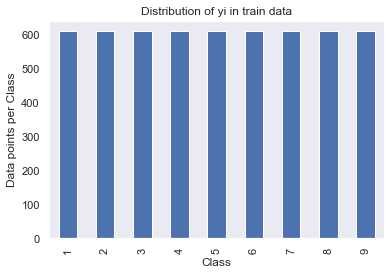

In [67]:
#count of classes plotted
my_colors = 'rgbkymc'
train_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

In [68]:
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/train_df.shape[0]*100), 3), '%)')

Number of data points in class 1 : 610 ( 11.125 %)
Number of data points in class 6 : 610 ( 11.125 %)
Number of data points in class 2 : 609 ( 11.107 %)
Number of data points in class 3 : 609 ( 11.107 %)
Number of data points in class 4 : 609 ( 11.107 %)
Number of data points in class 5 : 609 ( 11.107 %)
Number of data points in class 7 : 609 ( 11.107 %)
Number of data points in class 8 : 609 ( 11.107 %)
Number of data points in class 9 : 609 ( 11.107 %)


--------------------------------------------------------------------------------


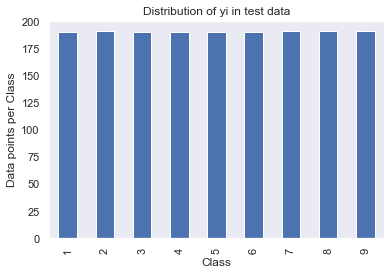

In [69]:
print('-'*80)
my_colors = 'rgbkymc'
test_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()

In [70]:
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/test_df.shape[0]*100), 3), '%)')

Number of data points in class 2 : 191 ( 11.144 %)
Number of data points in class 7 : 191 ( 11.144 %)
Number of data points in class 8 : 191 ( 11.144 %)
Number of data points in class 9 : 191 ( 11.144 %)
Number of data points in class 1 : 190 ( 11.085 %)
Number of data points in class 3 : 190 ( 11.085 %)
Number of data points in class 4 : 190 ( 11.085 %)
Number of data points in class 5 : 190 ( 11.085 %)
Number of data points in class 6 : 190 ( 11.085 %)


--------------------------------------------------------------------------------


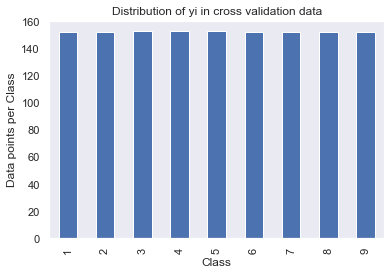

Number of data points in class 1 : 152 ( 11.087 %)
Number of data points in class 6 : 152 ( 11.087 %)
Number of data points in class 2 : 152 ( 11.087 %)
Number of data points in class 3 : 153 ( 11.16 %)
Number of data points in class 4 : 153 ( 11.16 %)
Number of data points in class 5 : 153 ( 11.16 %)
Number of data points in class 7 : 152 ( 11.087 %)
Number of data points in class 8 : 152 ( 11.087 %)
Number of data points in class 9 : 152 ( 11.087 %)


In [71]:
print('-'*80)
my_colors = 'rgbkymc'
cv_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in cross validation data')
plt.grid()
plt.show()

# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',cv_class_distribution.values[i], '(', np.round((cv_class_distribution.values[i]/cv_df.shape[0]*100), 3), '%)')

In [72]:
newempty = []
def get_gv_fea_dict(alpha, feature, df):
    # train_df['Gene'].value_counts()
    #         BRCA1      174
    #         TP53       106
    #         EGFR        86
    #         BRCA2       75
    #         PTEN        69
    #         KIT         61
    #         BRAF        60
    #         ERBB2       47
    #         PDGFRA      46
    # train_df['Variation'].value_counts()
    
    # {
    # Truncating_Mutations                     63
    # Deletion                                 43
    # Amplification                            43
    # Fusions                                  22
    # Overexpression                            3
    # E17K                                      3
    # Q61L                                      3
    # S222D                                     2
    # P130S                                     2
    # ...
    # }
    value_count = train_df[feature].value_counts()
    
    #Gene Variation Dict, which contains the probability array for each gene/variation
    gv_dict = dict()
    
    for i, denominator in value_count.items():
        # vec will contain probability of gene/variation belongs to perticular class
        
        vec = []
        for k in range(1,10):
            # print(train_df.loc[(train_df['Class']==1) & (train_df['Gene']=='BRCA1')])
            #         ID   Gene             Variation  Class  
            # 2470  2470  BRCA1                S1715C      1   
            # 2486  2486  BRCA1                S1841R      1   
            # 2614  2614  BRCA1                   M1R      1   
            # 2432  2432  BRCA1                L1657P      1   
            # 2567  2567  BRCA1                T1685A      1   
            # 2583  2583  BRCA1                E1660G      1   
            # 2634  2634  BRCA1                W1718L      1   
            

            cls_cnt = train_df.loc[(train_df['Class']==k) & (train_df[feature]==i)]
           
            vec.append((cls_cnt.shape[0] + alpha*10)/ (denominator + 90*alpha))

        gv_dict[i]=vec
    return gv_dict

def get_gv_feature(alpha, feature, df):
    # print(gv_dict)
    #     {'BRCA1': [0.20075757575757575, 0.03787878787878788, 0.068181818181818177, 0.13636363636363635, 0.25, 0.19318181818181818, 0.03787878787878788, 0.03787878787878788, 0.03787878787878788], 
    #      'TP53': [0.32142857142857145, 0.061224489795918366, 0.061224489795918366, 0.27040816326530615, 0.061224489795918366, 0.066326530612244902, 0.051020408163265307, 0.051020408163265307, 0.056122448979591837], 
    #      'EGFR': [0.056818181818181816, 0.21590909090909091, 0.0625, 0.068181818181818177, 0.068181818181818177, 0.0625, 0.34659090909090912, 0.0625, 0.056818181818181816], 
    #      'BRCA2': [0.13333333333333333, 0.060606060606060608, 0.060606060606060608, 0.078787878787878782, 0.1393939393939394, 0.34545454545454546, 0.060606060606060608, 0.060606060606060608, 0.060606060606060608], 
    #      'PTEN': [0.069182389937106917, 0.062893081761006289, 0.069182389937106917, 0.46540880503144655, 0.075471698113207544, 0.062893081761006289, 0.069182389937106917, 0.062893081761006289, 0.062893081761006289], 
    #      'KIT': [0.066225165562913912, 0.25165562913907286, 0.072847682119205295, 0.072847682119205295, 0.066225165562913912, 0.066225165562913912, 0.27152317880794702, 0.066225165562913912, 0.066225165562913912], 
    #      'BRAF': [0.066666666666666666, 0.17999999999999999, 0.073333333333333334, 0.073333333333333334, 0.093333333333333338, 0.080000000000000002, 0.29999999999999999, 0.066666666666666666, 0.066666666666666666],
    #      ...
    #     }
    gv_dict = get_gv_fea_dict(alpha, feature, df)
    # value_count is similar in get_gv_fea_dict
    value_count = train_df[feature].value_counts()
    
    # gv_fea: Gene_variation feature, it will contain the feature for each feature value in the data
    gv_fea = []
    # for every feature values in the given data frame we will check if it is there in the train data then we will add the feature to gv_fea
    # if not we will add [1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9] to gv_fea
    for index, row in df.iterrows():
        if row[feature] in dict(value_count).keys():
            #print(row[feature])
            gv_fea.append(gv_dict[row[feature]])
        else:
            gv_fea.append([1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9])
#             gv_fea.append([-1,-1,-1,-1,-1,-1,-1,-1,-1])
    return gv_fea

In [73]:
unique_genes = train_df['Gene'].value_counts()
print('Number of Unique Genes :', unique_genes.shape[0])
# the top 10 genes that occured most
print(unique_genes.head(10))

Number of Unique Genes : 232
BRCA1    549
SF3B1    267
BRCA2    260
EGFR     171
TP53     167
PTEN     158
BCOR     131
ALK      122
IDH1     119
IDH2     116
Name: Gene, dtype: int64


In [74]:
alpha = 1
# train gene feature
train_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", train_df))
# test gene feature
test_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", test_df))
# cross validation gene feature
cv_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", cv_df))

In [75]:
train_gene_feature_responseCoding

array([[0.13458529, 0.01564945, 0.17527387, ..., 0.01564945, 0.01564945,
        0.01564945],
       [0.06756757, 0.11486486, 0.06756757, ..., 0.14189189, 0.29054054,
        0.06756757],
       [0.05376344, 0.10215054, 0.43548387, ..., 0.12903226, 0.05376344,
        0.05376344],
       ...,
       [0.0280112 , 0.0280112 , 0.0280112 , ..., 0.0280112 , 0.10644258,
        0.69747899],
       [0.07428571, 0.02857143, 0.02857143, ..., 0.02857143, 0.02857143,
        0.02857143],
       [0.06711409, 0.11409396, 0.06711409, ..., 0.1409396 , 0.06711409,
        0.06711409]])

In [76]:
# one-hot encoding of Gene feature.
from sklearn.feature_extraction.text import CountVectorizer
gene_vectorizer = CountVectorizer()
train_gene_feature_onehotCoding = gene_vectorizer.fit_transform(train_df['Gene'])
test_gene_feature_onehotCoding = gene_vectorizer.transform(test_df['Gene'])
cv_gene_feature_onehotCoding = gene_vectorizer.transform(cv_df['Gene'])

In [77]:
temp_list = []
for i in test_gene_feature_onehotCoding:
    temp_list.append(list(i.A[0]))

#print(temp_list)

In [78]:
#gene_vectorizer.get_feature_names()

In [79]:
train_gene_feature_onehotCoding.shape

(5483, 232)

In [80]:
type(train_gene_feature_onehotCoding)


scipy.sparse.csr.csr_matrix

In [81]:
train_gene_feature_onehotCoding.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [82]:
unique_variations = train_df['Variation'].value_counts()
print('Number of Unique Variations :', unique_variations.shape[0])
# the top 10 variations that occured most
print(unique_variations.head(10))

Number of Unique Variations : 2129
Truncating Mutations    113
Deletion                 76
Amplification            70
Fusions                  59
HMGA2-RAD51B Fusion      45
R172G                    40
G35V                     39
BCOR-RARA Fusion         38
BCOR-CCNB3 Fusion        36
R132Q                    35
Name: Variation, dtype: int64


In [83]:
unique_variations.shape[0]

2129

In [84]:
alpha = 1
# train gene feature
train_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", train_df))
# test gene feature
test_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", test_df))
# cross validation gene feature
cv_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", cv_df))

In [85]:
train_variation_feature_responseCoding.shape

(5483, 9)

In [86]:
# one-hot encoding of variation feature.
variation_vectorizer = CountVectorizer()
train_variation_feature_onehotCoding = variation_vectorizer.fit_transform(train_df['Variation'])
test_variation_feature_onehotCoding = variation_vectorizer.transform(test_df['Variation'])
cv_variation_feature_onehotCoding = variation_vectorizer.transform(cv_df['Variation'])

In [87]:
train_variation_feature_onehotCoding.shape

(5483, 2161)

In [88]:
def extract_dictionary_paddle(cls_text):
    dictionary = defaultdict(int)
    for index, row in cls_text.iterrows():
        for word in row['cleaned_text'].split():
            dictionary[word] +=1
    return dictionary

In [89]:
import math
def get_text_responsecoding(df):
    text_feature_responseCoding = np.zeros((df.shape[0],9))
    for i in range(0,9):
        row_index = 0
        for index, row in df.iterrows():
            sum_prob = 0
            for word in row['cleaned_text'].split():
                sum_prob += math.log(((dict_list[i].get(word,0)+10 )/(total_dict.get(word,0)+90)))
            text_feature_responseCoding[row_index][i] = math.exp(sum_prob/len(row['cleaned_text'].split()))
            row_index += 1
    return text_feature_responseCoding

In [90]:
# building a CountVectorizer with all the words that occured minimum 3 times in train data
text_vectorizer = CountVectorizer(min_df=3)
train_text_feature_onehotCoding = text_vectorizer.fit_transform(train_df['cleaned_text'])
# getting all the feature names (words)
train_text_features= text_vectorizer.get_feature_names()

# train_text_feature_onehotCoding.sum(axis=0).A1 will sum every row and returns (1*number of features) vector
train_text_fea_counts = train_text_feature_onehotCoding.sum(axis=0).A1
train_text_fea_counts
# zip(list(text_features),text_fea_counts) will zip a word with its number of times it occured
text_fea_dict = dict(zip(list(train_text_features),train_text_fea_counts))


print("Total number of unique words in train data :", len(train_text_features))

Total number of unique words in train data : 70485


In [91]:
#train_text_features

In [92]:
from collections import Counter, defaultdict
dict_list = []
# dict_list =[] contains 9 dictoinaries each corresponds to a class
for i in range(1,10):
    cls_text = train_df[train_df['Class']==i]
    # build a word dict based on the words in that class
    dict_list.append(extract_dictionary_paddle(cls_text))
    # append it to dict_list
    #print(dict_list)
# dict_list[i] is build on i'th  class text data
# total_dict is buid on whole training text data
total_dict = extract_dictionary_paddle(train_df)

confuse_array = []
for i in train_text_features:
    ratios = []
    max_val = -1
    for j in range(0,9):
        ratios.append((dict_list[j][i]+10 )/(total_dict[i]+90))
    confuse_array.append(ratios)
confuse_array = np.array(confuse_array)

In [93]:
#response coding of text features
train_text_feature_responseCoding  = get_text_responsecoding(train_df)
test_text_feature_responseCoding  = get_text_responsecoding(test_df)
cv_text_feature_responseCoding  = get_text_responsecoding(cv_df)

In [94]:
train_text_feature_responseCoding = (train_text_feature_responseCoding.T/train_text_feature_responseCoding.sum(axis=1)).T
test_text_feature_responseCoding = (test_text_feature_responseCoding.T/test_text_feature_responseCoding.sum(axis=1)).T
cv_text_feature_responseCoding = (cv_text_feature_responseCoding.T/cv_text_feature_responseCoding.sum(axis=1)).T

In [95]:
from sklearn.preprocessing import normalize
train_text_feature_onehotCoding = normalize(train_text_feature_onehotCoding, axis=0)

# we use the same vectorizer that was trained on train data
test_text_feature_onehotCoding = text_vectorizer.transform(test_df['cleaned_text'])
# don't forget to normalize every feature
test_text_feature_onehotCoding = normalize(test_text_feature_onehotCoding, axis=0)

# we use the same vectorizer that was trained on train data
cv_text_feature_onehotCoding = text_vectorizer.transform(cv_df['cleaned_text'])
# don't forget to normalize every feature
cv_text_feature_onehotCoding = normalize(cv_text_feature_onehotCoding, axis=0)

In [96]:
cv_text_feature_onehotCoding
# Accuracy
from sklearn.metrics import accuracy_score

log_loss_list = []
accuracy_list = []
misclassified_list = []

In [97]:
print("One-hot encoding of Gene in train set : ", train_gene_feature_onehotCoding.shape)
print("One-hot encoding of Gene in test set : ", test_gene_feature_onehotCoding.shape)
print("One-hot encoding of Gene in cross validation set : ", cv_gene_feature_onehotCoding.shape)

One-hot encoding of Gene in train set :  (5483, 232)
One-hot encoding of Gene in test set :  (1714, 232)
One-hot encoding of Gene in cross validation set :  (1371, 232)


In [98]:
print("One-hot encoding of variation in train set : ", train_variation_feature_onehotCoding.shape)
print("One-hot encoding of variation in test set : ", test_variation_feature_onehotCoding.shape)
print("One-hot encoding of variation in cross validation set : ", cv_variation_feature_onehotCoding.shape)

One-hot encoding of variation in train set :  (5483, 2161)
One-hot encoding of variation in test set :  (1714, 2161)
One-hot encoding of variation in cross validation set :  (1371, 2161)


In [99]:
print("One-hot encoding of Text in train set : ", train_text_feature_onehotCoding.shape)
print("One-hot encoding of Text in test set : ", test_text_feature_onehotCoding.shape)
print("One-hot encoding of Text in cross validation set : ", cv_text_feature_onehotCoding.shape)

One-hot encoding of Text in train set :  (5483, 70485)
One-hot encoding of Text in test set :  (1714, 70485)
One-hot encoding of Text in cross validation set :  (1371, 70485)


## Machine Learning Models

In [100]:
def predict_and_plot_confusion_matrix(train_x, train_y,test_x, test_y, clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    pred_y = sig_clf.predict(test_x)

    # for calculating log_loss we willl provide the array of probabilities belongs to each class
    log_loss_value = log_loss(test_y, sig_clf.predict_proba(test_x))
    print("Log loss :", log_loss_value)
    log_loss_list.append(log_loss_value)
    # calculating the number of data points that are misclassified
    mis_value = np.count_nonzero((pred_y- test_y))/test_y.shape[0]
    print("Number of mis-classified points :", mis_value)
    misclassified_list.append(mis_value)
    plot_confusion_matrix(test_y, pred_y)

In [101]:

def report_log_loss(train_x, train_y, test_x, test_y,  clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    sig_clf_probs = sig_clf.predict_proba(test_x)
    return log_loss(test_y, sig_clf_probs, eps=1e-15)

In [102]:
def get_impfeature_names(indices, text, gene, var, no_features):
    gene_count_vec = CountVectorizer()
    var_count_vec = CountVectorizer()
    text_count_vec = CountVectorizer(min_df=3)
    
    gene_vec = gene_count_vec.fit(train_df['Gene'])
    var_vec  = var_count_vec.fit(train_df['Variation'])
    text_vec = text_count_vec.fit(train_df['cleaned_text'])
    
    fea1_len = len(gene_vec.get_feature_names())
    fea2_len = len(var_count_vec.get_feature_names())
    
    word_present = 0
    for i,v in enumerate(indices):
        if (v < fea1_len):
            word = gene_vec.get_feature_names()[v]
            yes_no = True if word == gene else False
            if yes_no:
                word_present += 1
                print(i, "Gene feature [{}] present in test data point [{}]".format(word,yes_no))
        elif (v < fea1_len+fea2_len):
            word = var_vec.get_feature_names()[v-(fea1_len)]
            yes_no = True if word == var else False
            if yes_no:
                word_present += 1
                print(i, "variation feature [{}] present in test data point [{}]".format(word,yes_no))
        else:
            word = text_vec.get_feature_names()[v-(fea1_len+fea2_len)]
            yes_no = True if word in text.split() else False
            if yes_no:
                word_present += 1
                print(i, "Text feature [{}] present in test data point [{}]".format(word,yes_no))

    print("Out of the top ",no_features," features ", word_present, "are present in query point")

In [103]:
from scipy.sparse import hstack
train_gene_var_onehotCoding = hstack((train_gene_feature_onehotCoding,train_variation_feature_onehotCoding))
test_gene_var_onehotCoding = hstack((test_gene_feature_onehotCoding,test_variation_feature_onehotCoding))
cv_gene_var_onehotCoding = hstack((cv_gene_feature_onehotCoding,cv_variation_feature_onehotCoding))

train_x_onehotCoding = hstack((train_gene_var_onehotCoding, train_text_feature_onehotCoding)).tocsr()
train_y = np.array(list(train_df['Class']))

test_x_onehotCoding = hstack((test_gene_var_onehotCoding, test_text_feature_onehotCoding)).tocsr()
test_y = np.array(list(test_df['Class']))

cv_x_onehotCoding = hstack((cv_gene_var_onehotCoding, cv_text_feature_onehotCoding)).tocsr()
cv_y = np.array(list(cv_df['Class']))


train_gene_var_responseCoding = np.hstack((train_gene_feature_responseCoding,train_variation_feature_responseCoding))
test_gene_var_responseCoding = np.hstack((test_gene_feature_responseCoding,test_variation_feature_responseCoding))
cv_gene_var_responseCoding = np.hstack((cv_gene_feature_responseCoding,cv_variation_feature_responseCoding))

train_x_responseCoding = np.hstack((train_gene_var_responseCoding, train_text_feature_responseCoding))
test_x_responseCoding = np.hstack((test_gene_var_responseCoding, test_text_feature_responseCoding))
cv_x_responseCoding = np.hstack((cv_gene_var_responseCoding, cv_text_feature_responseCoding))

In [104]:
print("One hot encoding features :")
print("(number of data points * number of features) in train data = ", train_x_onehotCoding.shape)
print("(number of data points * number of features) in test data = ", test_x_onehotCoding.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_onehotCoding.shape)

One hot encoding features :
(number of data points * number of features) in train data =  (5483, 72878)
(number of data points * number of features) in test data =  (1714, 72878)
(number of data points * number of features) in cross validation data = (1371, 72878)


In [105]:

print(" Response encoding features :")
print("(number of data points * number of features) in train data = ", train_x_responseCoding.shape)
print("(number of data points * number of features) in test data = ", test_x_responseCoding.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_responseCoding.shape)

 Response encoding features :
(number of data points * number of features) in train data =  (5483, 27)
(number of data points * number of features) in test data =  (1714, 27)
(number of data points * number of features) in cross validation data = (1371, 27)


#### NAIVE BAYES 


for alpha = 1e-05
Log Loss : 0.6778364924056292
for alpha = 0.0001
Log Loss : 0.6855356711938445
for alpha = 0.001
Log Loss : 0.691161859846189
for alpha = 0.1
Log Loss : 0.7856629786230778
for alpha = 1
Log Loss : 0.8622428627004802
for alpha = 10
Log Loss : 0.9196065511447752
for alpha = 100
Log Loss : 0.862868909666809
for alpha = 1000
Log Loss : 0.831368240741386


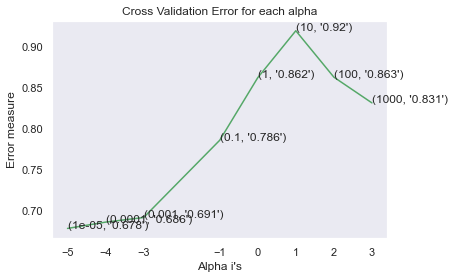

For values of best alpha =  1e-05 The train log loss is: 0.44690967719563823
For values of best alpha =  1e-05 The cross validation log loss is: 0.6778364924056292
For values of best alpha =  1e-05 The test log loss is: 0.6899185970996975


In [106]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics.classification import accuracy_score, log_loss
alpha = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = MultinomialNB(alpha=i)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(np.log10(alpha), cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),cv_log_error_array[i]))
plt.grid()
plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)


predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

In [107]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [1,2,3,4,5,6,7,8,9]
    # representing A in heatmap format
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    df_cm = pd.DataFrame(C, index = [i for i in "123456789"],
    columns = [i for i in "123456789"])
    lines = df_cm.plot.line()
    #fig.set_size_inches(18.5, 10.5)
    plt.show()
    
    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    df_cm = pd.DataFrame(B, index = [i for i in "123456789"],
    columns = [i for i in "123456789"])
    lines = df_cm.plot.line()
    plt.show()
    
    # representing B in heatmap format
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    df_cm = pd.DataFrame(A, index = [i for i in "123456789"],
    columns = [i for i in "123456789"])
    lines = df_cm.plot.line()
    plt.show()
    aa = accuracy_score(test_y, predict_y)
    print('Accuracy:', aa)
    accuracy_list.append(aa)
    

## Testing the model

Log Loss : 0.6778364924056292
Number of missclassified point : 0.15973741794310722
-------------------- Confusion matrix --------------------


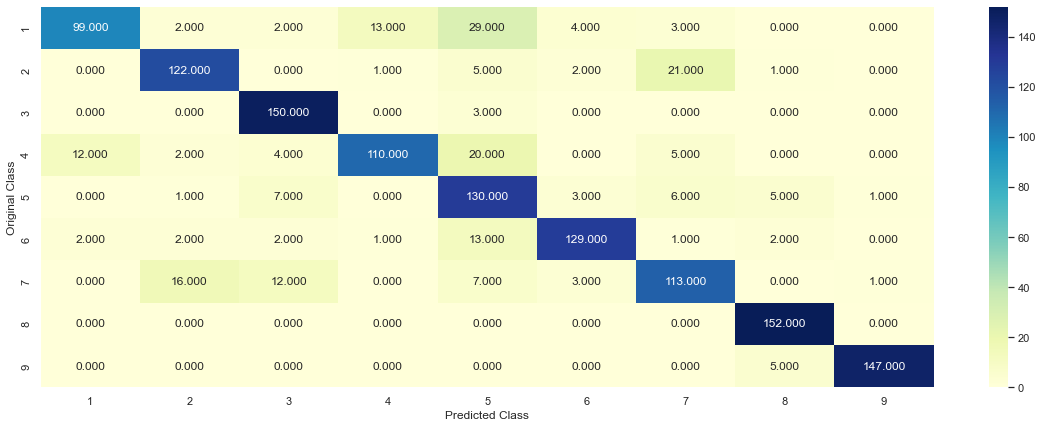

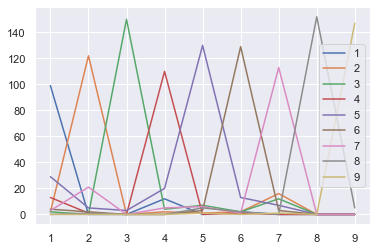

-------------------- Precision matrix (Columm Sum=1) --------------------


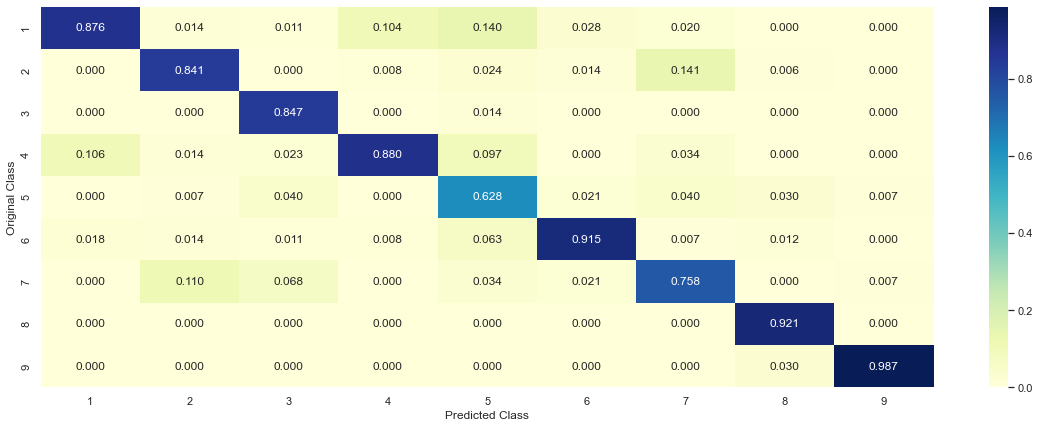

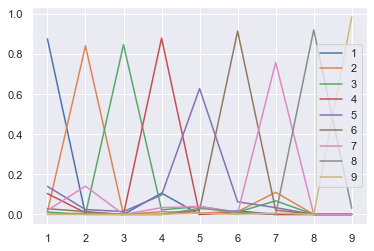

-------------------- Recall matrix (Row sum=1) --------------------


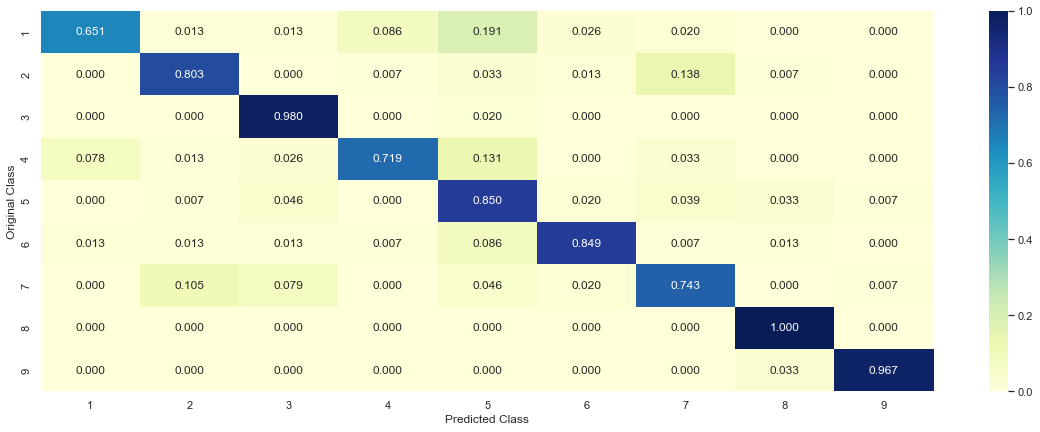

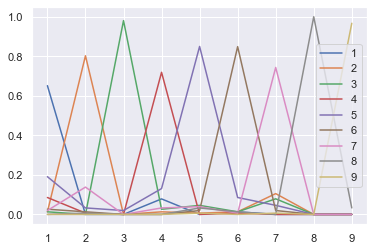

Accuracy: 0.8402625820568927


In [108]:
from sklearn.metrics import confusion_matrix
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)
sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
# to avoid rounding error while multiplying probabilites we use log-probability estimates
a1 = log_loss(cv_y, sig_clf_probs)
print("Log Loss :", a1)
print("Number of missclassified point :", np.count_nonzero((sig_clf.predict(cv_x_onehotCoding)- cv_y))/cv_y.shape[0])
plot_confusion_matrix(cv_y, sig_clf.predict(cv_x_onehotCoding.toarray()))

In [109]:
test_point_index = 100
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
#get_impfeature_names(indices[0], test_df['cleaned_text'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 3
Predicted Class Probabilities: [[4.140e-02 3.550e-02 8.132e-01 3.600e-02 2.210e-02 1.820e-02 3.060e-02
  2.300e-03 8.000e-04]]
Actual Class : 3
--------------------------------------------------


## K Nearest Neighbour Classification

for alpha = 5
Log Loss : 0.3398020750634096
for alpha = 11
Log Loss : 0.4350200163647797
for alpha = 15
Log Loss : 0.48275736641063904
for alpha = 21
Log Loss : 0.5257228972691484
for alpha = 31
Log Loss : 0.5920925328558723
for alpha = 41
Log Loss : 0.6453956894486931
for alpha = 51
Log Loss : 0.6764899656769581
for alpha = 99
Log Loss : 0.7837055623494155


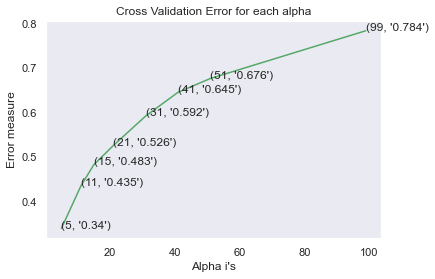

For values of best alpha =  5 The train log loss is: 0.1672722728393658
For values of best alpha =  5 The cross validation log loss is: 0.3398020750634096
For values of best alpha =  5 The test log loss is: 0.37856333234016526


In [110]:
from sklearn.neighbors import KNeighborsClassifier
alpha = [5, 11, 15, 21, 31, 41, 51, 99]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(train_x_responseCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_responseCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_responseCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_responseCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_responseCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_responseCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

Log loss : 0.3398020750634096
Number of mis-classified points : 0.09919766593727207
-------------------- Confusion matrix --------------------


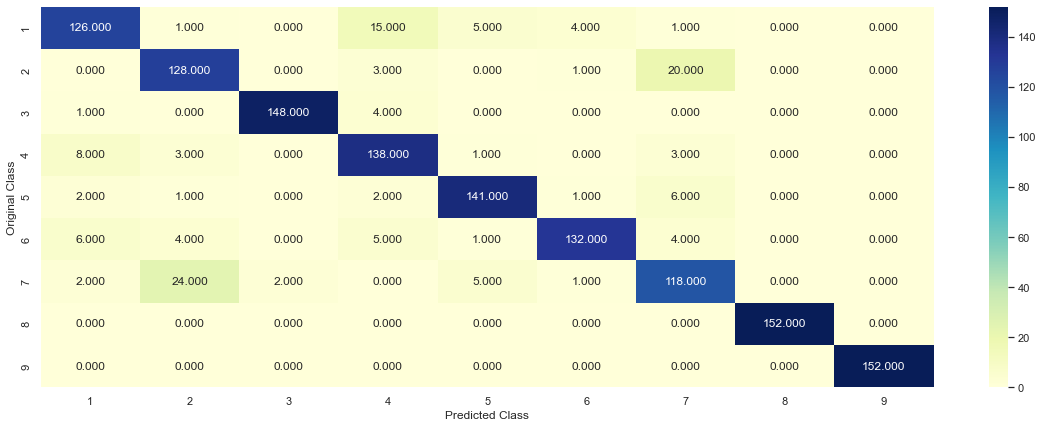

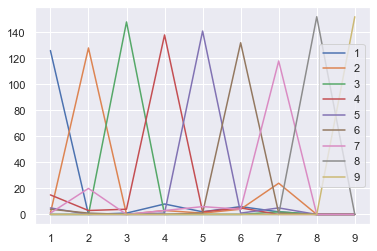

-------------------- Precision matrix (Columm Sum=1) --------------------


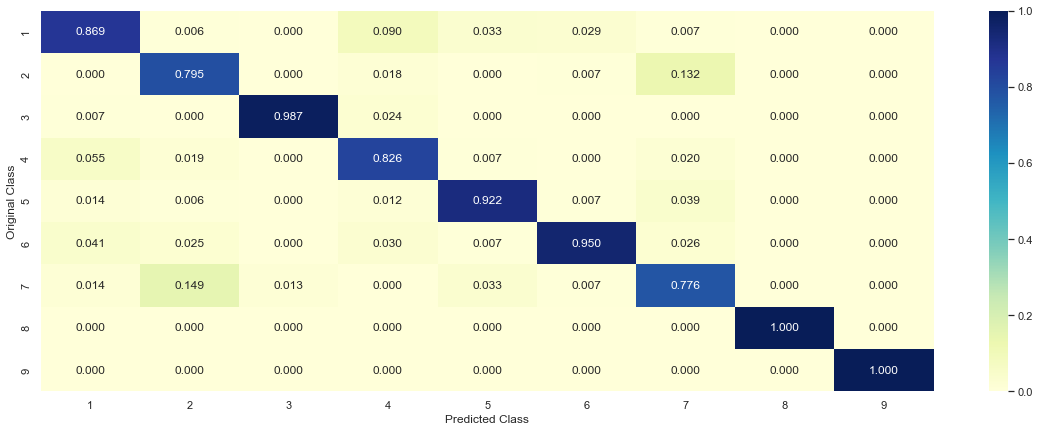

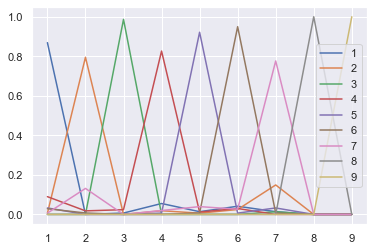

-------------------- Recall matrix (Row sum=1) --------------------


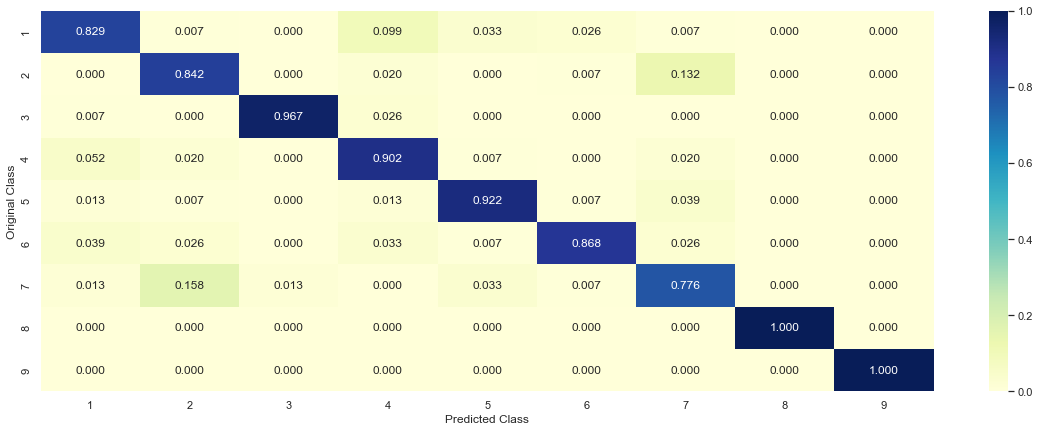

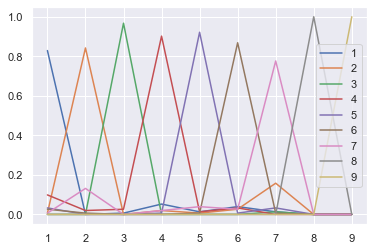

Accuracy: 0.9008023340627279


In [111]:
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
predict_and_plot_confusion_matrix(train_x_responseCoding, train_y, cv_x_responseCoding, cv_y, clf)

In [112]:
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

test_point_index = 25

predicted_cls = sig_clf.predict(test_x_responseCoding[0].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Actual Class :", test_y[test_point_index])
neighbors = clf.kneighbors(test_x_responseCoding[test_point_index].reshape(1, -1), alpha[best_alpha])
print("The ",alpha[best_alpha]," nearest neighbours of the test points belongs to classes",train_y[neighbors[1][0]])
print("Fequency of nearest points :",Counter(train_y[neighbors[1][0]]))

Predicted Class : 3
Actual Class : 3
The  5  nearest neighbours of the test points belongs to classes [3 3 3 3 3]
Fequency of nearest points : Counter({3: 5})


## Linear Support Vector Machines

for C = 1e-05
Log Loss : 0.5407633341624883
for C = 0.0001
Log Loss : 0.3970787056122069
for C = 0.001
Log Loss : 0.43268359879427803
for C = 0.01
Log Loss : 0.5979809246697445
for C = 0.1
Log Loss : 0.9263457748252212
for C = 1
Log Loss : 1.5475885645884682
for C = 10
Log Loss : 1.5476252313973697
for C = 100
Log Loss : 1.5476241231035366


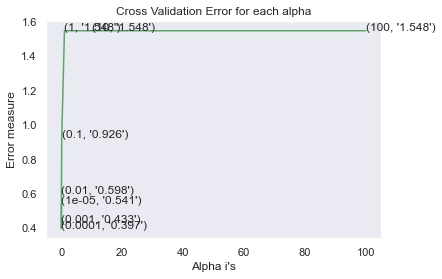

For values of best alpha =  0.0001 The train log loss is: 0.1396948428726251
For values of best alpha =  0.0001 The cross validation log loss is: 0.3970787056122069
For values of best alpha =  0.0001 The test log loss is: 0.386656697064123


In [113]:
from sklearn.linear_model import SGDClassifier
alpha = [10 ** x for x in range(-5, 3)]
cv_log_error_array = []
for i in alpha:
    print("for C =", i)
#     clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
    clf = SGDClassifier( class_weight='balanced', alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
# clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

Log loss : 0.3970787056122069
Number of mis-classified points : 0.08679795769511306
-------------------- Confusion matrix --------------------


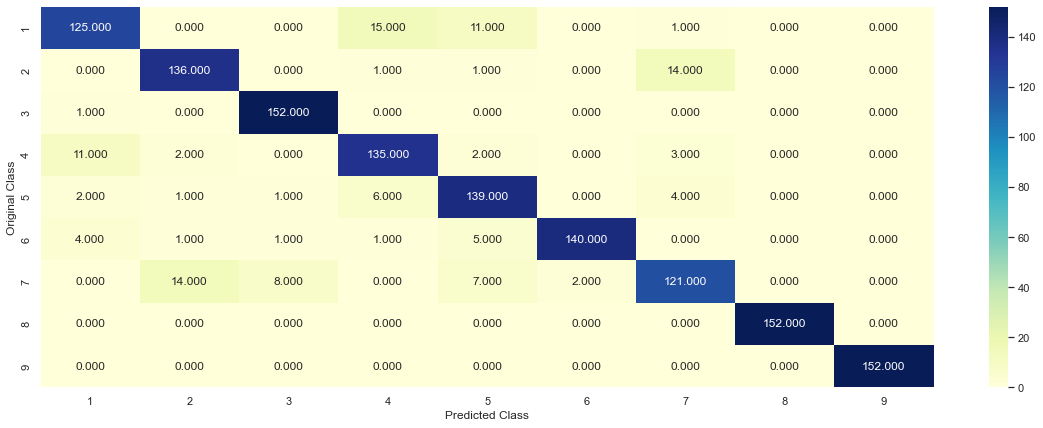

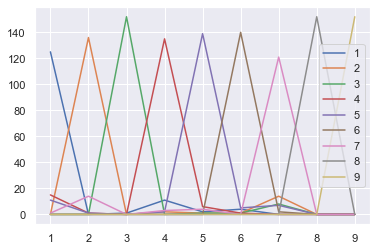

-------------------- Precision matrix (Columm Sum=1) --------------------


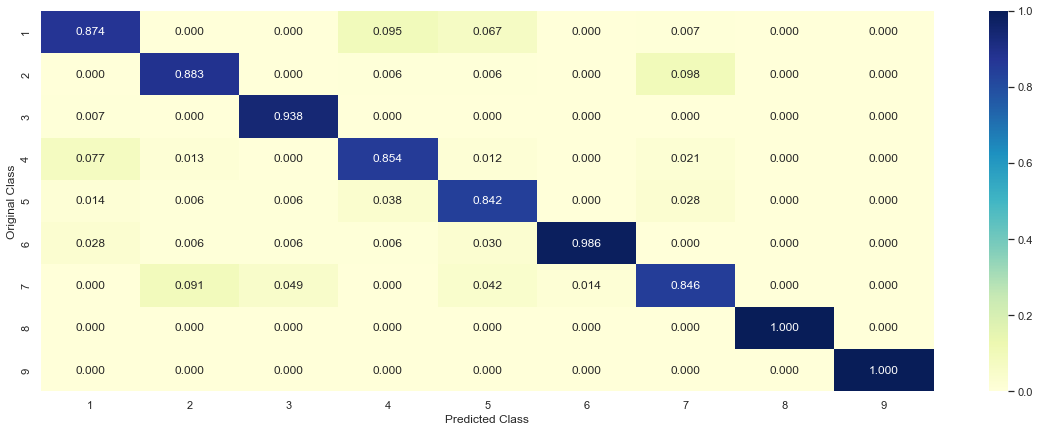

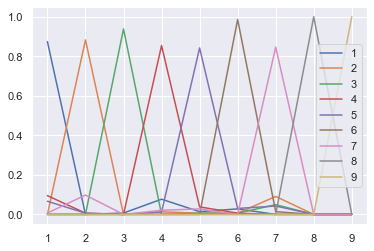

-------------------- Recall matrix (Row sum=1) --------------------


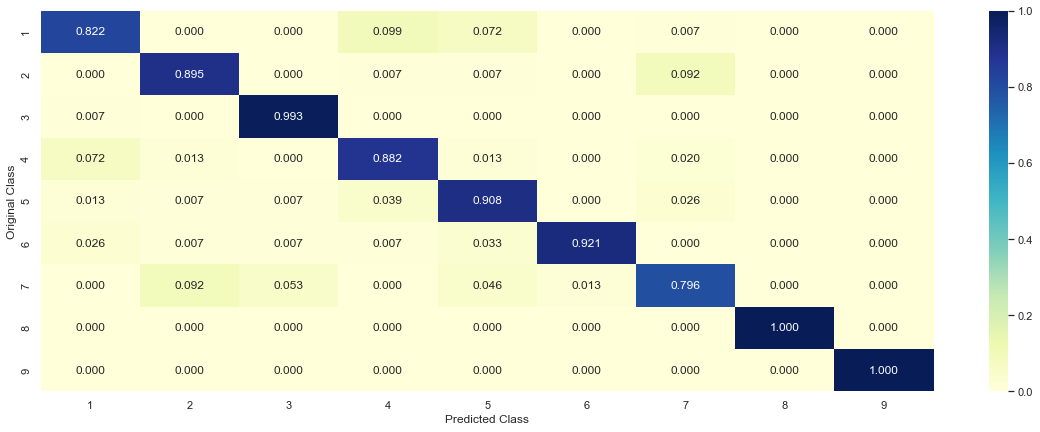

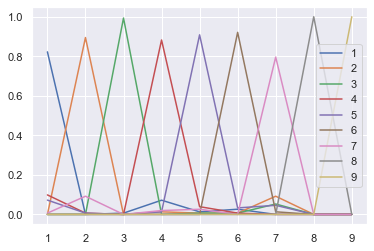

Accuracy: 0.913202042304887


In [114]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42,class_weight='balanced')
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y,cv_x_onehotCoding,cv_y, clf)

In [115]:
test_point_index = 100
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
#get_impfeature_names(indices[0], test_df['cleaned_text'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 3
Predicted Class Probabilities: [[5.100e-03 1.870e-02 8.582e-01 5.350e-02 7.000e-03 1.800e-03 5.350e-02
  8.000e-04 1.400e-03]]
Actual Class : 3
--------------------------------------------------


In [116]:
train_y

array([6, 8, 2, ..., 9, 6, 6])

## LOGISTIC REGRESSION

for alpha = 1e-06
Log Loss : 0.6216085976814624
for alpha = 1e-05
Log Loss : 0.41147306433353575
for alpha = 0.0001
Log Loss : 0.3501660192445704
for alpha = 0.001
Log Loss : 0.4334632529752869
for alpha = 0.01
Log Loss : 0.6846044395712958
for alpha = 0.1
Log Loss : 1.0697109956787325
for alpha = 1
Log Loss : 1.4745814546983755
for alpha = 10
Log Loss : 1.5388657713366705
for alpha = 100
Log Loss : 1.5460658985630216


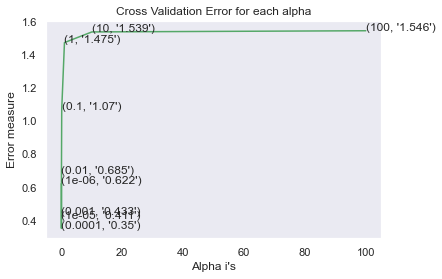

For values of best alpha =  0.0001 The train log loss is: 0.14463918878666457
For values of best alpha =  0.0001 The cross validation log loss is: 0.3501660192445704
For values of best alpha =  0.0001 The test log loss is: 0.3603216113560803


In [117]:
alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

Log loss : 0.3501660192445704
Number of mis-classified points : 0.10430342815463166
-------------------- Confusion matrix --------------------


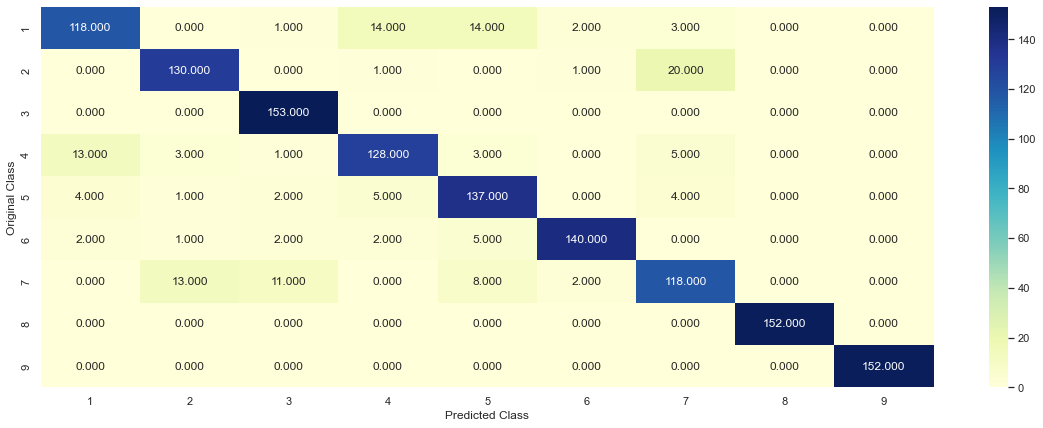

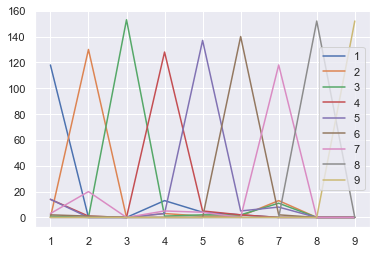

-------------------- Precision matrix (Columm Sum=1) --------------------


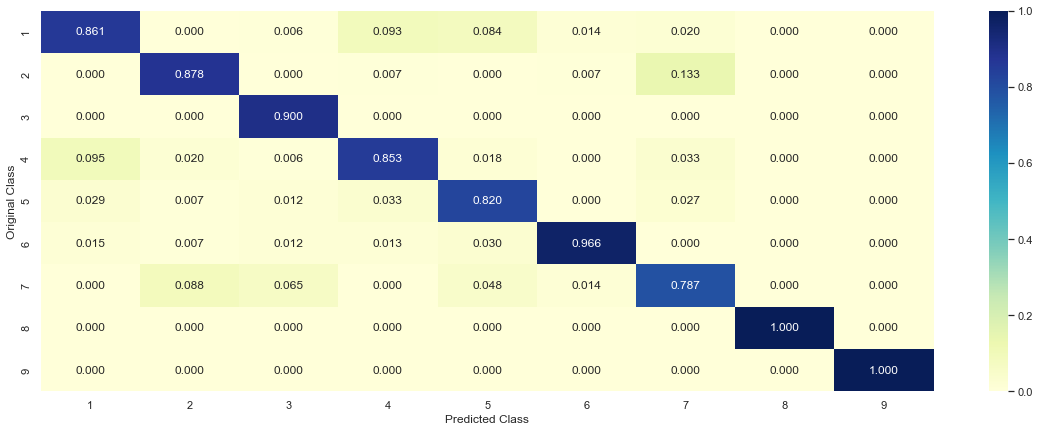

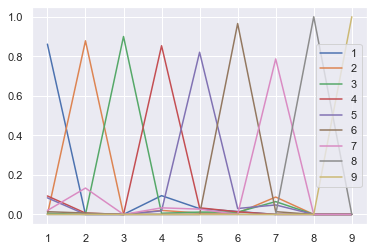

-------------------- Recall matrix (Row sum=1) --------------------


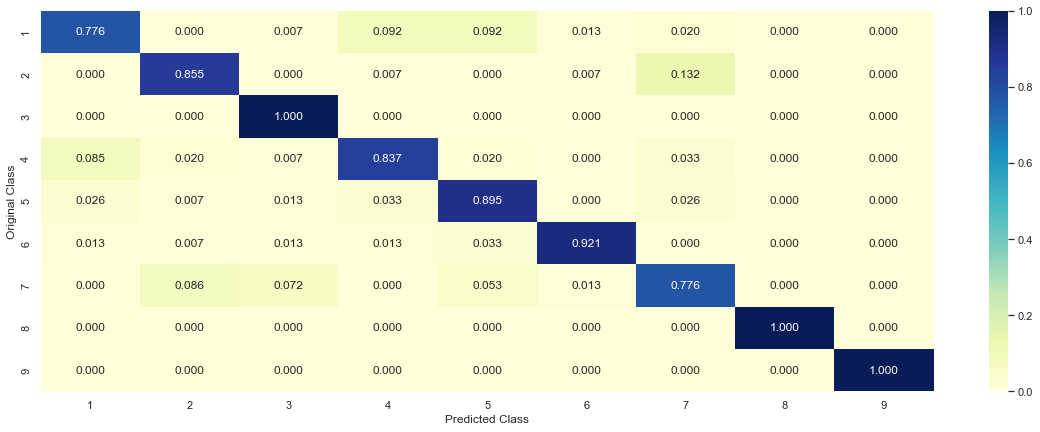

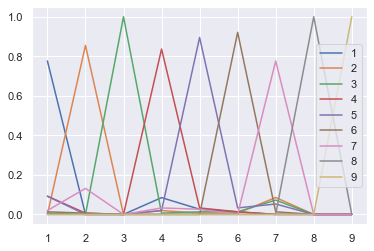

Accuracy: 0.8956965718453683


In [118]:
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y, cv_x_onehotCoding, cv_y, clf)

In [119]:
# from tabulate import tabulate
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding,train_y)
test_point_index = 10
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
#get_impfeature_names(indices[0], test_df['cleaned_text'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 2
Predicted Class Probabilities: [[5.000e-04 5.474e-01 3.200e-03 1.200e-03 6.400e-03 1.000e-04 4.413e-01
  0.000e+00 0.000e+00]]
Actual Class : 7
--------------------------------------------------


## Random Forest

In [120]:
from sklearn.ensemble import RandomForestClassifier
alpha = [100,200,500,1000,2000]
max_depth = [5, 10]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(train_x_onehotCoding, train_y)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_x_onehotCoding, train_y)
        sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
        cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

for n_estimators = 100 and max depth =  5
Log Loss : 1.2223339605202372
for n_estimators = 100 and max depth =  10
Log Loss : 0.9937171369289722
for n_estimators = 200 and max depth =  5
Log Loss : 1.1885180333468002
for n_estimators = 200 and max depth =  10
Log Loss : 0.9788318443872858
for n_estimators = 500 and max depth =  5
Log Loss : 1.1882668009547948
for n_estimators = 500 and max depth =  10
Log Loss : 0.967532929111851
for n_estimators = 1000 and max depth =  5
Log Loss : 1.1726748375501677
for n_estimators = 1000 and max depth =  10
Log Loss : 0.964265957384919
for n_estimators = 2000 and max depth =  5
Log Loss : 1.1707714323429739
for n_estimators = 2000 and max depth =  10
Log Loss : 0.9611644483387403
For values of best estimator =  2000 The train log loss is: 0.63237275771772
For values of best estimator =  2000 The cross validation log loss is: 0.9611644483387423
For values of best estimator =  2000 The test log loss is: 0.9287582309110237


Log loss : 0.9611644483387402
Number of mis-classified points : 0.33552151714077316
-------------------- Confusion matrix --------------------


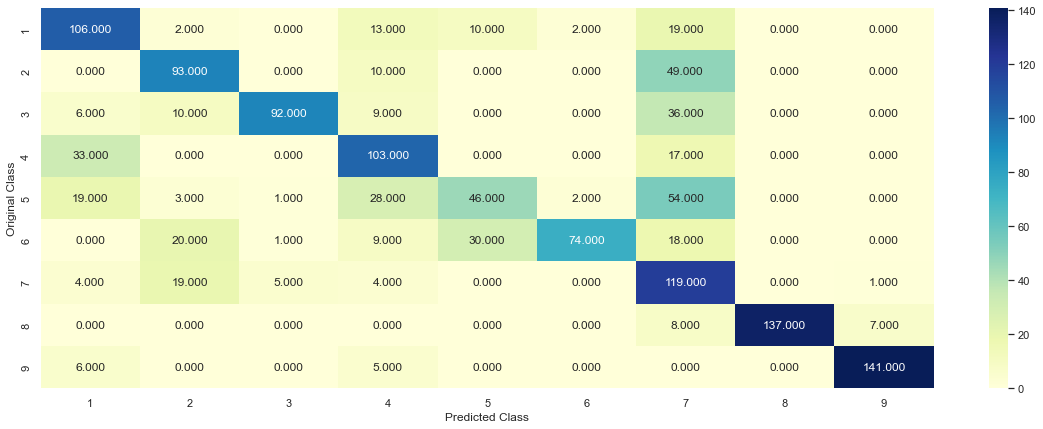

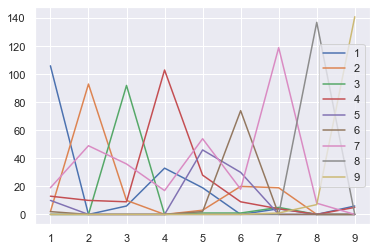

-------------------- Precision matrix (Columm Sum=1) --------------------


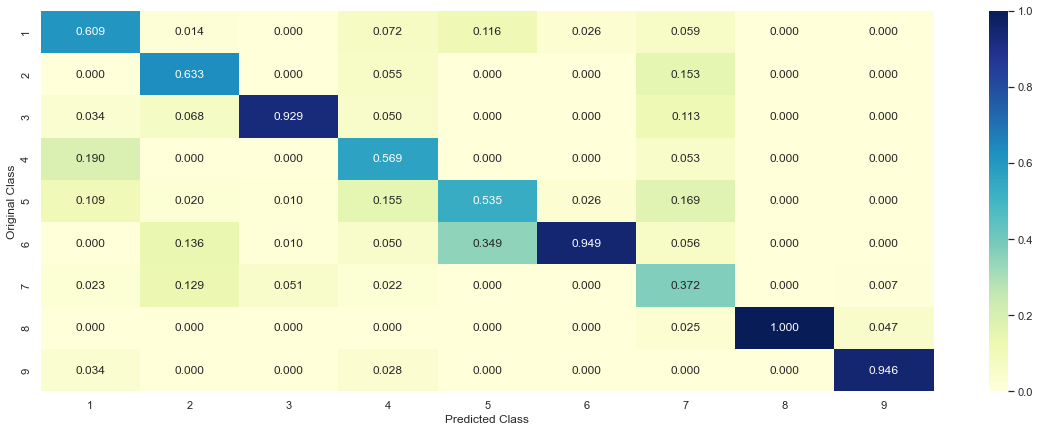

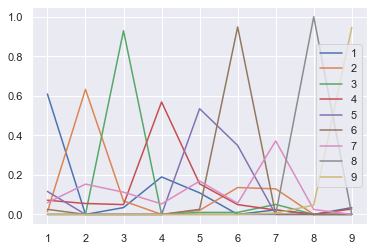

-------------------- Recall matrix (Row sum=1) --------------------


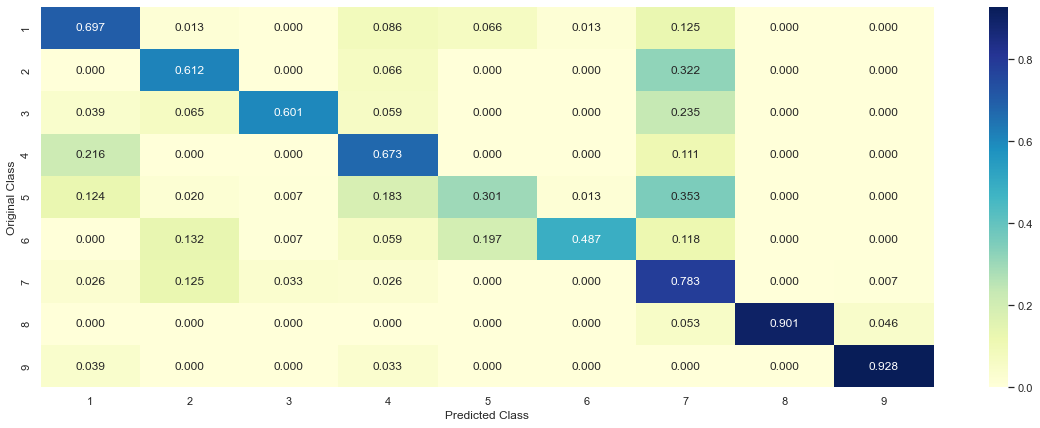

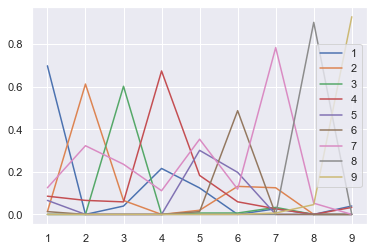

Accuracy: 0.6644784828592268


In [121]:
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y,cv_x_onehotCoding,cv_y, clf)

In [122]:
# test_point_index = 10
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

test_point_index = 10
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
#get_impfeature_names(indices[:no_feature], test_df['cleaned_text'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.084  0.151  0.0228 0.0797 0.0566 0.0272 0.5585 0.0082 0.0121]]
Actual Class : 7
--------------------------------------------------


In [123]:
print(accuracy_list)
#misclassified_list.insert(0,0.17286652078774617)
#log_loss_list.insert(0,0.6850412767857371)
print(misclassified_list)
print(log_loss_list)

[0.8402625820568927, 0.9008023340627279, 0.913202042304887, 0.8956965718453683, 0.6644784828592268]
[0.09919766593727207, 0.08679795769511306, 0.10430342815463166, 0.33552151714077316]
[0.3398020750634096, 0.3970787056122069, 0.3501660192445704, 0.9611644483387402]


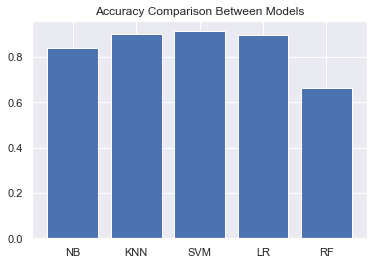

In [124]:
#accuracy
import matplotlib.pyplot as plt
import numpy as np
xpoints = np.array(['NB', 'KNN', 'SVM', 'LR', 'RF'])
ypoints = np.array(accuracy_list)
plt.title('Accuracy Comparison Between Models')
plt.bar(xpoints, ypoints)
plt.show()

## Stacking all the models

In [125]:
from sklearn.linear_model import LogisticRegression
from mlxtend.classifier import StackingClassifier

#LOGISTIC REGRESSION
clf1 = SGDClassifier(alpha=0.0001, penalty='l2', loss='log', class_weight='balanced', random_state=0)
clf1.fit(train_x_onehotCoding, train_y)
sig_clf1 = CalibratedClassifierCV(clf1, method="sigmoid")

#LSVM
clf2 = SGDClassifier(alpha=0.0001, penalty='l2', loss='hinge', class_weight='balanced', random_state=42)
clf2.fit(train_x_onehotCoding, train_y)
sig_clf2 = CalibratedClassifierCV(clf2, method="sigmoid")

#NAIVE BAYES
clf3 = MultinomialNB(alpha=0.00001)
clf3.fit(train_x_onehotCoding, train_y)
sig_clf3 = CalibratedClassifierCV(clf3, method="sigmoid")

#KNN
clf4=  KNeighborsClassifier(n_neighbors=5)
clf4.fit(train_x_responseCoding, train_y)
sig_clf4 = CalibratedClassifierCV(clf4, method="sigmoid")

#RANDOM FOREST
clf5=  RandomForestClassifier(n_estimators=2000, criterion='gini', max_depth=10, random_state=42, n_jobs=-1)
clf5.fit(train_x_onehotCoding, train_y)
sig_clf5 = CalibratedClassifierCV(clf5, method="sigmoid")

sig_clf1.fit(train_x_onehotCoding, train_y)
print("Logistic Regression :  Log Loss: %0.2f" % (log_loss(cv_y, sig_clf1.predict_proba(cv_x_onehotCoding))))

sig_clf2.fit(train_x_onehotCoding, train_y)
print("Support vector machines : Log Loss: %0.2f" % (log_loss(cv_y, sig_clf2.predict_proba(cv_x_onehotCoding))))

sig_clf3.fit(train_x_onehotCoding, train_y)
print("Naive Bayes : Log Loss: %0.2f" % (log_loss(cv_y, sig_clf3.predict_proba(cv_x_onehotCoding))))

sig_clf4.fit(train_x_onehotCoding, train_y)
print("KNN : Log Loss: %0.2f" % (log_loss(cv_y, sig_clf4.predict_proba(cv_x_onehotCoding))))

sig_clf5.fit(train_x_onehotCoding, train_y)
print("RANDOM FOREST: Log Loss: %0.2f" % (log_loss(cv_y, sig_clf5.predict_proba(cv_x_onehotCoding))))

print("-"*50)
alpha = [0.0001,0.001,0.01,0.1,1,10] 
best_alpha = 999
for i in alpha:
    lr = LogisticRegression(C=i)
    sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3, sig_clf4, sig_clf5], meta_classifier=lr, use_probas=True)
    sclf.fit(train_x_onehotCoding, train_y)
    print("Stacking Classifer : for the value of alpha: %f Log Loss: %0.3f" % (i, log_loss(cv_y, sclf.predict_proba(cv_x_onehotCoding))))
    log_error =log_loss(cv_y, sclf.predict_proba(cv_x_onehotCoding))
    if best_alpha > log_error:
        best_alpha = log_error

Logistic Regression :  Log Loss: 0.35
Support vector machines : Log Loss: 0.40
Naive Bayes : Log Loss: 0.68
KNN : Log Loss: 0.61
RANDOM FOREST: Log Loss: 0.96
--------------------------------------------------
Stacking Classifer : for the value of alpha: 0.000100 Log Loss: 2.065
Stacking Classifer : for the value of alpha: 0.001000 Log Loss: 1.294
Stacking Classifer : for the value of alpha: 0.010000 Log Loss: 0.487
Stacking Classifer : for the value of alpha: 0.100000 Log Loss: 0.335
Stacking Classifer : for the value of alpha: 1.000000 Log Loss: 0.360
Stacking Classifer : for the value of alpha: 10.000000 Log Loss: 0.440


Predicted Class : 3
Actual Class : 3
Log loss (train) on the stacking classifier : 0.05370697428868415
Log loss (CV) on the stacking classifier : 0.33537398059466395
Log loss (test) on the stacking classifier : 0.36820672101425717
Number of missclassified point : 0.09568261376896149
-------------------- Confusion matrix --------------------


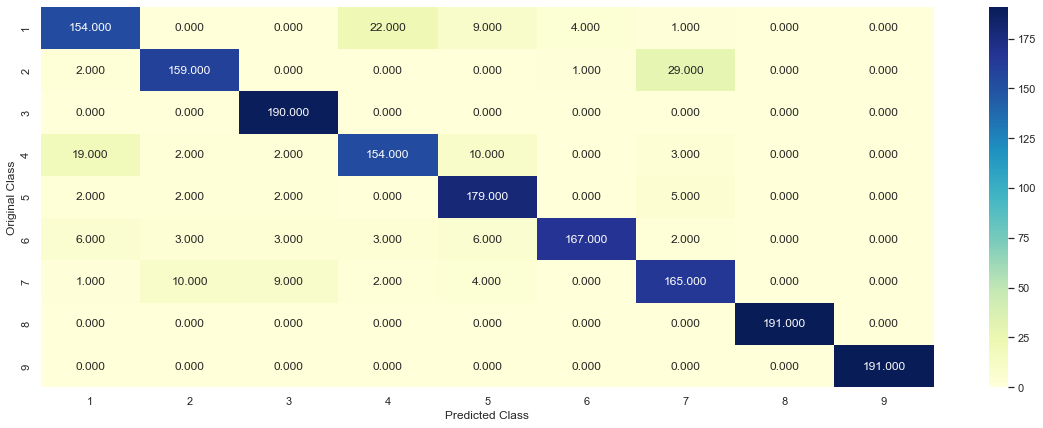

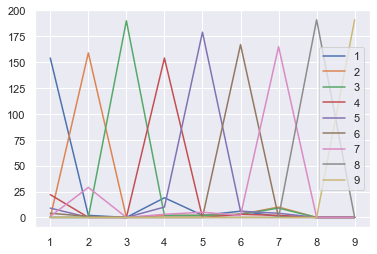

-------------------- Precision matrix (Columm Sum=1) --------------------


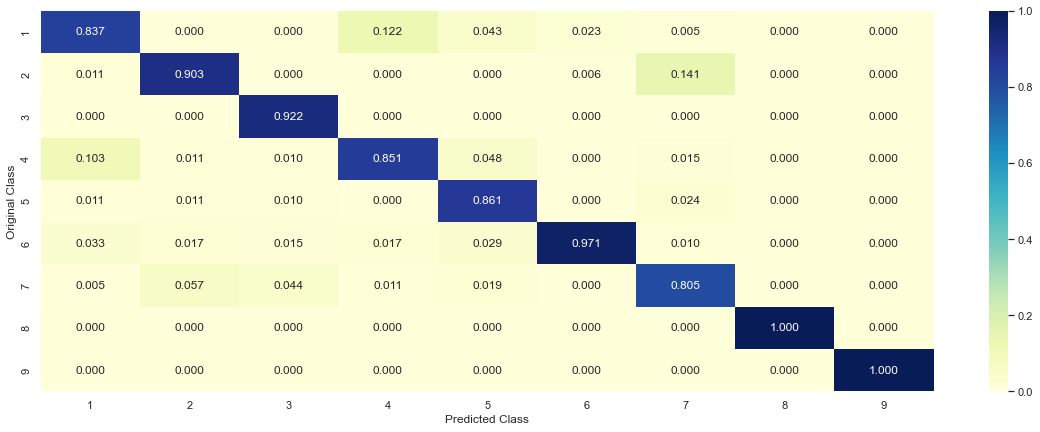

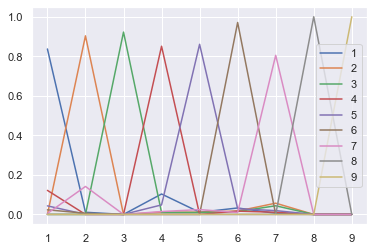

-------------------- Recall matrix (Row sum=1) --------------------


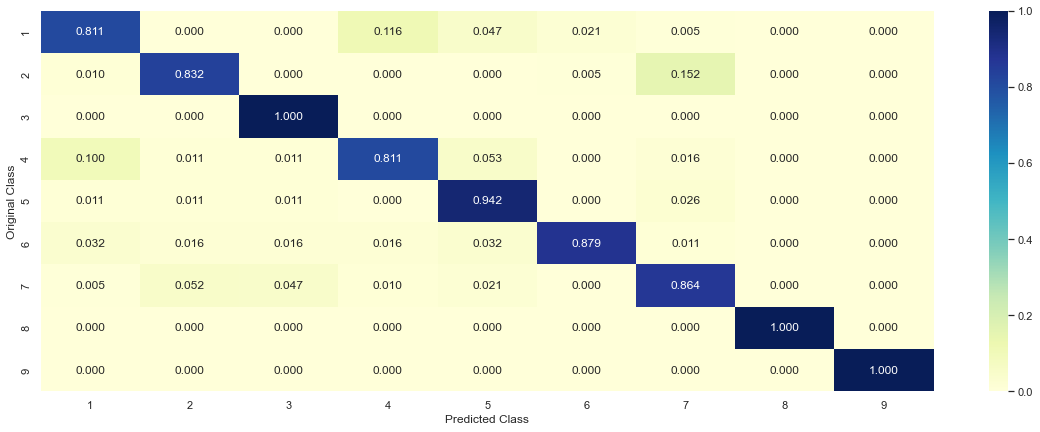

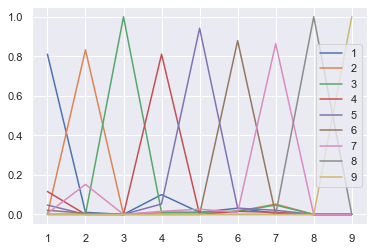

Accuracy: 0.9043173862310385


In [126]:
lr = LogisticRegression(C=0.1)
sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3, sig_clf4, sig_clf5], meta_classifier=lr, use_probas=True)
sclf.fit(train_x_onehotCoding, train_y)
#Model Prediction
test_point_index = 100
no_feature = 100
predicted_cls = sclf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Actual Class :", test_y[test_point_index])

log_error = log_loss(train_y, sclf.predict_proba(train_x_onehotCoding))
print("Log loss (train) on the stacking classifier :",log_error)

log_error = log_loss(cv_y, sclf.predict_proba(cv_x_onehotCoding))
print("Log loss (CV) on the stacking classifier :",log_error)

log_error = log_loss(test_y, sclf.predict_proba(test_x_onehotCoding))
print("Log loss (test) on the stacking classifier :",log_error)

print("Number of missclassified point :", np.count_nonzero((sclf.predict(test_x_onehotCoding)- test_y))/test_y.shape[0])
plot_confusion_matrix(test_y=test_y, predict_y=sclf.predict(test_x_onehotCoding))

## LSTM